In [21]:
"""
version 01.02
* Have function of Classificaion of BSA adsorption

version 02.01
* Change the PyTorch into SKlearn
version 02.02
* Change the descriptors

"""

'\nversion 01.02\n* Have function of Classificaion of BSA adsorption\n\nversion 02.01\n* Change the PyTorch into SKlearn\nversion 02.02\n* Change the descriptors\n\n'

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import shap

from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import PartialDependenceDisplay

from joblib import dump, load
import os

shap.initjs()
os.makedirs('models', exist_ok=True)

In [23]:
raw = pd.read_csv("250201_All_exp_value.csv")
raw

Protein adsorption / ng cm-2  Protein MW (kDa)  Protein Charge (pI)  \
0                           992.0              66.5                  4.7   
1                           396.5              66.5                  4.7   
2                           400.6              66.5                  4.7   
3                           391.5              66.5                  4.7   
4                             8.9              66.5                  4.7   
..                            ...               ...                  ...   
96                            0.0             340.0                  5.8   
97                          254.0             340.0                  5.8   
98                          567.2             340.0                  5.8   
99                          125.1             340.0                  5.8   
100                          63.0             340.0                  5.8   

     Protein conc. (mg/mL)  Thickness (nm)  Predicted Zeta (mV)  \
0                      1.0           13.80            16.319553   
1                      1.0           19.50             7.166369   
2                      1.0           10.30            -9.967725   
3                      1.0           15.20           -29.943920   
4                      1.0           20.20           -18.314512   
..                     ...             ...                  ...   
96                     NaN           12.49            -1.272445   
97                     NaN           18.93           -51.277580   
98                     NaN           22.40           -15.430634   
99                     NaN           40.10            -9.828280   
100                    NaN           50.00           -12.517403   

     Predicted CA (deg)  MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  \
0             16.000903          10.784035       10.784035           0.313102   
1             65.901976          65.901976       11.123746          11.123746   
2             74.526047          10.421065       10.421065           0.312500   
3             82.069702          10.631481       10.631481           0.047037   
4             42.474985          11.141062       11.141062           0.204506   
..                  ...                ...             ...                ...   
96            12.318509                NaN             NaN                NaN   
97            13.966482                NaN             NaN                NaN   
98            48.254231                NaN             NaN                NaN   
99            50.506325                NaN             NaN                NaN   
100           25.857781                NaN             NaN                NaN   

     ...  fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  \
0    ...           0.0         0.0                0.0           0.0   
1    ...           0.0         0.0                0.0           0.0   
2    ...           0.0         0.0                0.0           0.0   
3    ...           0.0         0.0                0.0           0.0   
4    ...           0.0         0.0                0.0           0.0   
..   ...           ...         ...                ...           ...   
96   ...           NaN         NaN                NaN           NaN   
97   ...           NaN         NaN                NaN           NaN   
98   ...           NaN         NaN                NaN           NaN   
99   ...           NaN         NaN                NaN           NaN   
100  ...           NaN         NaN                NaN           NaN   

     fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  fr_urea  \
0            0.0          0.0           0.0               0.0      0.0   
1            0.0          0.0           0.0               0.0      0.0   
2            0.0          0.0           0.0               0.0      0.0   
3            0.0          0.0           0.0               0.0      0.0   
4            0.0          0.0           0.0              25.0      0.0   
..           ... 

In [24]:
df = raw[53:93]

df_label = df["Protein adsorption / ng cm-2"]

df = df.drop("Protein adsorption / ng cm-2", axis=1)
df.head()

Protein MW (kDa)  Protein Charge (pI)  Protein conc. (mg/mL)  \
53              14.0                 11.0                    1.0   
54              14.0                 11.0                    1.0   
55              14.0                 11.0                    1.0   
56              14.0                 11.0                    1.0   
57              14.0                 11.0                    1.0   

    Thickness (nm)  Predicted Zeta (mV)  Predicted CA (deg)  \
53          13.800            16.319553           16.000903   
54          16.600             8.157993           39.725957   
55          19.500             7.166369           65.901976   
56          11.962           -18.940662           81.844615   
57          16.822           -12.367573           47.561973   

    MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  ...  \
53          10.784035       10.784035           0.313102       -0.313102  ...   
54          10.960693       10.960693           0.000000       -0.298930  ...   
55          11.123746       11.123746           0.000000       -0.303276  ...   
56          10.695883       10.695883           0.283843       -0.283843  ...   
57          10.468843       10.468843           0.047315       -0.454583  ...   

    fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  fr_thiazole  \
53           0.0         0.0                0.0           0.0          0.0   
54           0.0         0.0                0.0           0.0          0.0   
55           0.0         0.0                0.0           0.0          0.0   
56           0.0         0.0                0.0           0.0          0.0   
57           0.0         0.0                0.0           0.0          0.0   

    fr_thiocyan  fr_thiophene  fr_unbrch_alkane  fr_urea  Unnamed: 217  
53          0.0           0.0               0.0      0.0           NaN  
54          0.0           0.0               0.0      0.0           NaN  
55          0.0           0.0               0.0      0.0           NaN  
56          0.0           0.0               1.0      0.0           NaN  
57          0.0           0.0               0.0      0.0           NaN  

[5 rows x 217 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


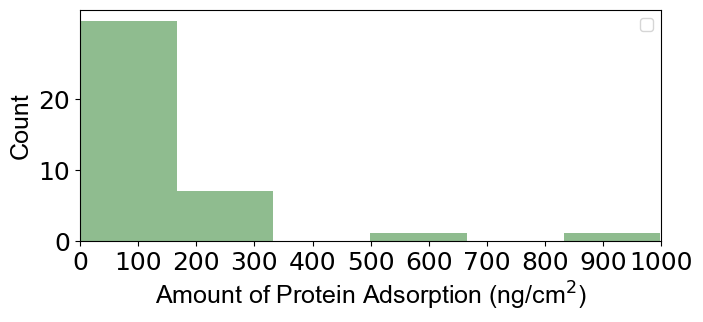

In [25]:
number_of_bins = 6
plt.figure(figsize=(7.5, 3))
plt.rcParams["font.size"] = 18
plt.hist(df_label, bins=number_of_bins, color=["darkseagreen"], edgecolor=None, stacked=False, alpha=1)
plt.legend(loc='upper right', fontsize=12)
plt.xlabel("Amount of Protein Adsorption (ng/cm$^2$)", font="Arial")
plt.ylabel("Count", font="Arial")
plt.xlim(0, 1000)
plt.xticks(np.arange(0, 1050, 100))
plt.yticks(np.arange(0,30,10))
plt.show()

In [26]:
def gen_fig1(model_name, X_train, Y_train, X_val, Y_val, RMSE_train, RMSE_val, r2_train, r2_test):
    #model_name = str(model_name)
    fig,ax=plt.subplots(figsize=(6, 6), dpi=300)
    Axis_line=np.linspace(*ax.get_xlim(),2)
    ax.plot(Axis_line,Axis_line,transform=ax.transAxes,linestyle='--',
            linewidth=2,color='black',label="1:1 Line")
    ax.set_xlim([0, 1100])
    ax.set_ylim([0, 1100])
    
    scatter1 = ax.scatter(X_train, Y_train, color='salmon', alpha=0.5, label="Training set")
    scatter2 = ax.scatter(X_val, Y_val, color='steelblue', alpha=0.5, label="Test set")
    plt.legend(handles=[scatter1, scatter2], labels = ["Training set", "Test set"], loc="lower right", fontsize=14, fancybox=True, markerscale=0.8, framealpha=0.8, handlelength=0.5)
    
    ax.text(25, 1075, " Score of "+model_name+" "
            "\n $RMSE$ (training): "+str(round(RMSE_train, 2))+" "
            "\n $RMSE$ (test): "+str(round(RMSE_val, 2))+" "
            #"\n $R^2$ of training set: "+str(round(r2_train, 2))+" "
            "\n $R\u00b2$ (training): "+str(round(r2_train, 2))+" "
            "\n $R\u00b2$ (test): "+str(round(r2_test, 2))+" ",
            verticalalignment='top', horizontalalignment='left',fontsize=20,
            bbox={'facecolor': 'lightskyblue', 'alpha': 0.2, 'pad': 1})
    
    plt.xlabel("Reported BSA Adsorption", fontsize=20, fontweight='bold', font="Arial")
    plt.ylabel("Predicted BSA Adsorption", fontsize=20, fontweight='bold', font="Arial")
    new_ticks = [0, 200, 400, 600, 800, 1000]
    #new_ticks = np.linspace(-75, 100, 9)
    plt.xticks(new_ticks, fontweight='bold')
    plt.yticks(new_ticks, fontweight='bold')
    ax.tick_params(labelsize="16", direction="in")
    
    plt.rcParams['axes.titley'] = 1.03
    #plt.title(model_name, fontsize=26,fontweight='bold',font="Arial", color='black')
    
    plt.show()
    plt.clf()
    
def result_show(model, model_name, X_part_array, Y_part_array, X_val_array, Y_val_array):
    
    model.fit(X_part_array, Y_part_array)
    Y_predict = model.predict(X_val_array)
    Y_part_predict = model.predict(X_part_array)
    
    RMSE_val = np.sqrt(mean_squared_error(Y_val_array, Y_predict))
    RMSE_train = np.sqrt(mean_squared_error(Y_part_array, Y_part_predict))
    # sns.distplot(Y_predict-Y_val_array)
    r2_train = r2_score(Y_part_array, Y_part_predict)
    r2_test = r2_score(Y_val_array, Y_predict)  
        
    gen_fig1(model_name, Y_part_array, Y_part_predict, Y_val_array, Y_predict, RMSE_train, RMSE_val, r2_train, r2_test)
    
    return model

A

In [27]:

selected_a = ["Thickness (nm)",
              "MolLogP",
              "PEOE_VSA6", "PEOE_VSA7", "PEOE_VSA8", "PEOE_VSA9", "PEOE_VSA10",
              "TPSA",
              "Protein conc. (mg/mL)"]
df_a = df[selected_a]

df_a.head()

Thickness (nm)  MolLogP  PEOE_VSA6  PEOE_VSA7  PEOE_VSA8  PEOE_VSA9  \
53          13.800   0.6673   6.578936  21.019081  12.117861   0.000000   
54          16.600  -1.7104   6.578936  20.771212   5.573105   0.000000   
55          19.500  -0.9334   6.578936  34.618686   5.573105   0.000000   
56          11.962   1.9058  19.923495  13.344559   5.573105   6.606882   
57          16.822   0.0980   6.578936   6.923737   5.573105   6.606882   

    PEOE_VSA10   TPSA  Protein conc. (mg/mL)  
53    6.606882  29.54                    1.0  
54   19.696395  32.20                    1.0  
55   18.690564  32.20                    1.0  
56    0.000000  26.30                    1.0  
57    6.606882  46.53                    1.0

In [28]:
scaler = MaxAbsScaler()
X_a = scaler.fit_transform(df_a)
X_a = np.array(X_a)

Y = np.array(df_label)

X_part_a, X_val_a, Y_part_array, Y_val_array = train_test_split(X_a, Y, test_size=0.2, random_state=42)


In [29]:
param_lasso = {"alpha": np.arange(0.05, 3., 0.01),
              "fit_intercept": [True, False]}

param_ridge = {"alpha": np.arange(0.05, 3., 0.01),
              "fit_intercept": [True, False]}

param_tree = {"max_depth": np.arange(1, 10),
             "min_samples_leaf": np.arange(1, 10, 1),
             "random_state": [42]}

param_forest = {"max_depth": np.arange(1, 10),
             "min_samples_leaf": np.arange(1, 5, 1),
             "n_estimators": [50, 75, 100, 125, 150, 250, 500],
             "random_state": [42]}

param_knn = {"n_neighbors": np.arange(1, 15),
              "weights": ["uniform", "distance"]}

param_svr = {"C": [0.1, 1, 10, 100, 1000],
              "epsilon": [0.01, 0.1, 1, 10],
              "kernel": ["linear", "poly", "rbf", "sigmoid"]}

param_xgb = {"max_depth": np.arange(1, 20),
             "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
             "n_estimators": [50, 75, 100, 125, 150, 250, 500],
             "random_state": [42]}

models_param = {
    "Lasso": {"model": Lasso(), "param": param_lasso},
    "Ridge": {"model": Ridge(), "param": param_ridge},
    "Decision Tree": {"model": DecisionTreeRegressor(), "param": param_tree},
    "Random Forest": {"model": RandomForestRegressor(), "param": param_forest},
    "kNN": {"model": KNeighborsRegressor(), "param": param_knn},
    "SVR": {"model": SVR(), "param": param_svr},
    "XGBoost": {"model": XGBRegressor(), "param": param_xgb}
}

optimized_models = {"Lasso":{"scores":[]},
                    "Ridge":{"scores":[]},
                    "Decision Tree":{"scores":[]},
                    "Random Forest":{"scores":[]},
                    "kNN":{"scores":[]},
                    "SVR":{"scores":[]},
                    "XGBoost":{"scores":[]}}

outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
loo = LeaveOneOut()

In [30]:
trained_models_a = []

for model_name, model_param in models_param.items():
    print("Training "+model_name+"...")
    model = model_param["model"]
    param = model_param["param"]
    
    grid = GridSearchCV(model, param, cv=outer_cv, n_jobs=-1)
    grid.fit(X_part_a, Y_part_array)
    #grid_models_peoe.append(grid)
    print("Best parameters for "+model_name, grid.best_params_)
    model_ = grid.best_estimator_
    # dump(model_peoe, model_name+"_peoe.joblib")
    trained_models_a.append(model_)

    print("-------------------------NEXT-------------------------")

Training Lasso...
Best parameters for Lasso {'alpha': 2.99, 'fit_intercept': False}
-------------------------NEXT-------------------------
Training Ridge...
Best parameters for Ridge {'alpha': 2.99, 'fit_intercept': False}
-------------------------NEXT-------------------------
Training Decision Tree...
Best parameters for Decision Tree {'max_depth': 1, 'min_samples_leaf': 7, 'random_state': 42}
-------------------------NEXT-------------------------
Training Random Forest...
Best parameters for Random Forest {'max_depth': 1, 'min_samples_leaf': 4, 'n_estimators': 50, 'random_state': 42}
-------------------------NEXT-------------------------
Training kNN...
Best parameters for kNN {'n_neighbors': 2, 'weights': 'distance'}
-------------------------NEXT-------------------------
Training SVR...
Best parameters for SVR {'C': 100, 'epsilon': 10, 'kernel': 'rbf'}
-------------------------NEXT-------------------------
Training XGBoost...
Best parameters for XGBoost {'learning_rate': 0.01, 'max_

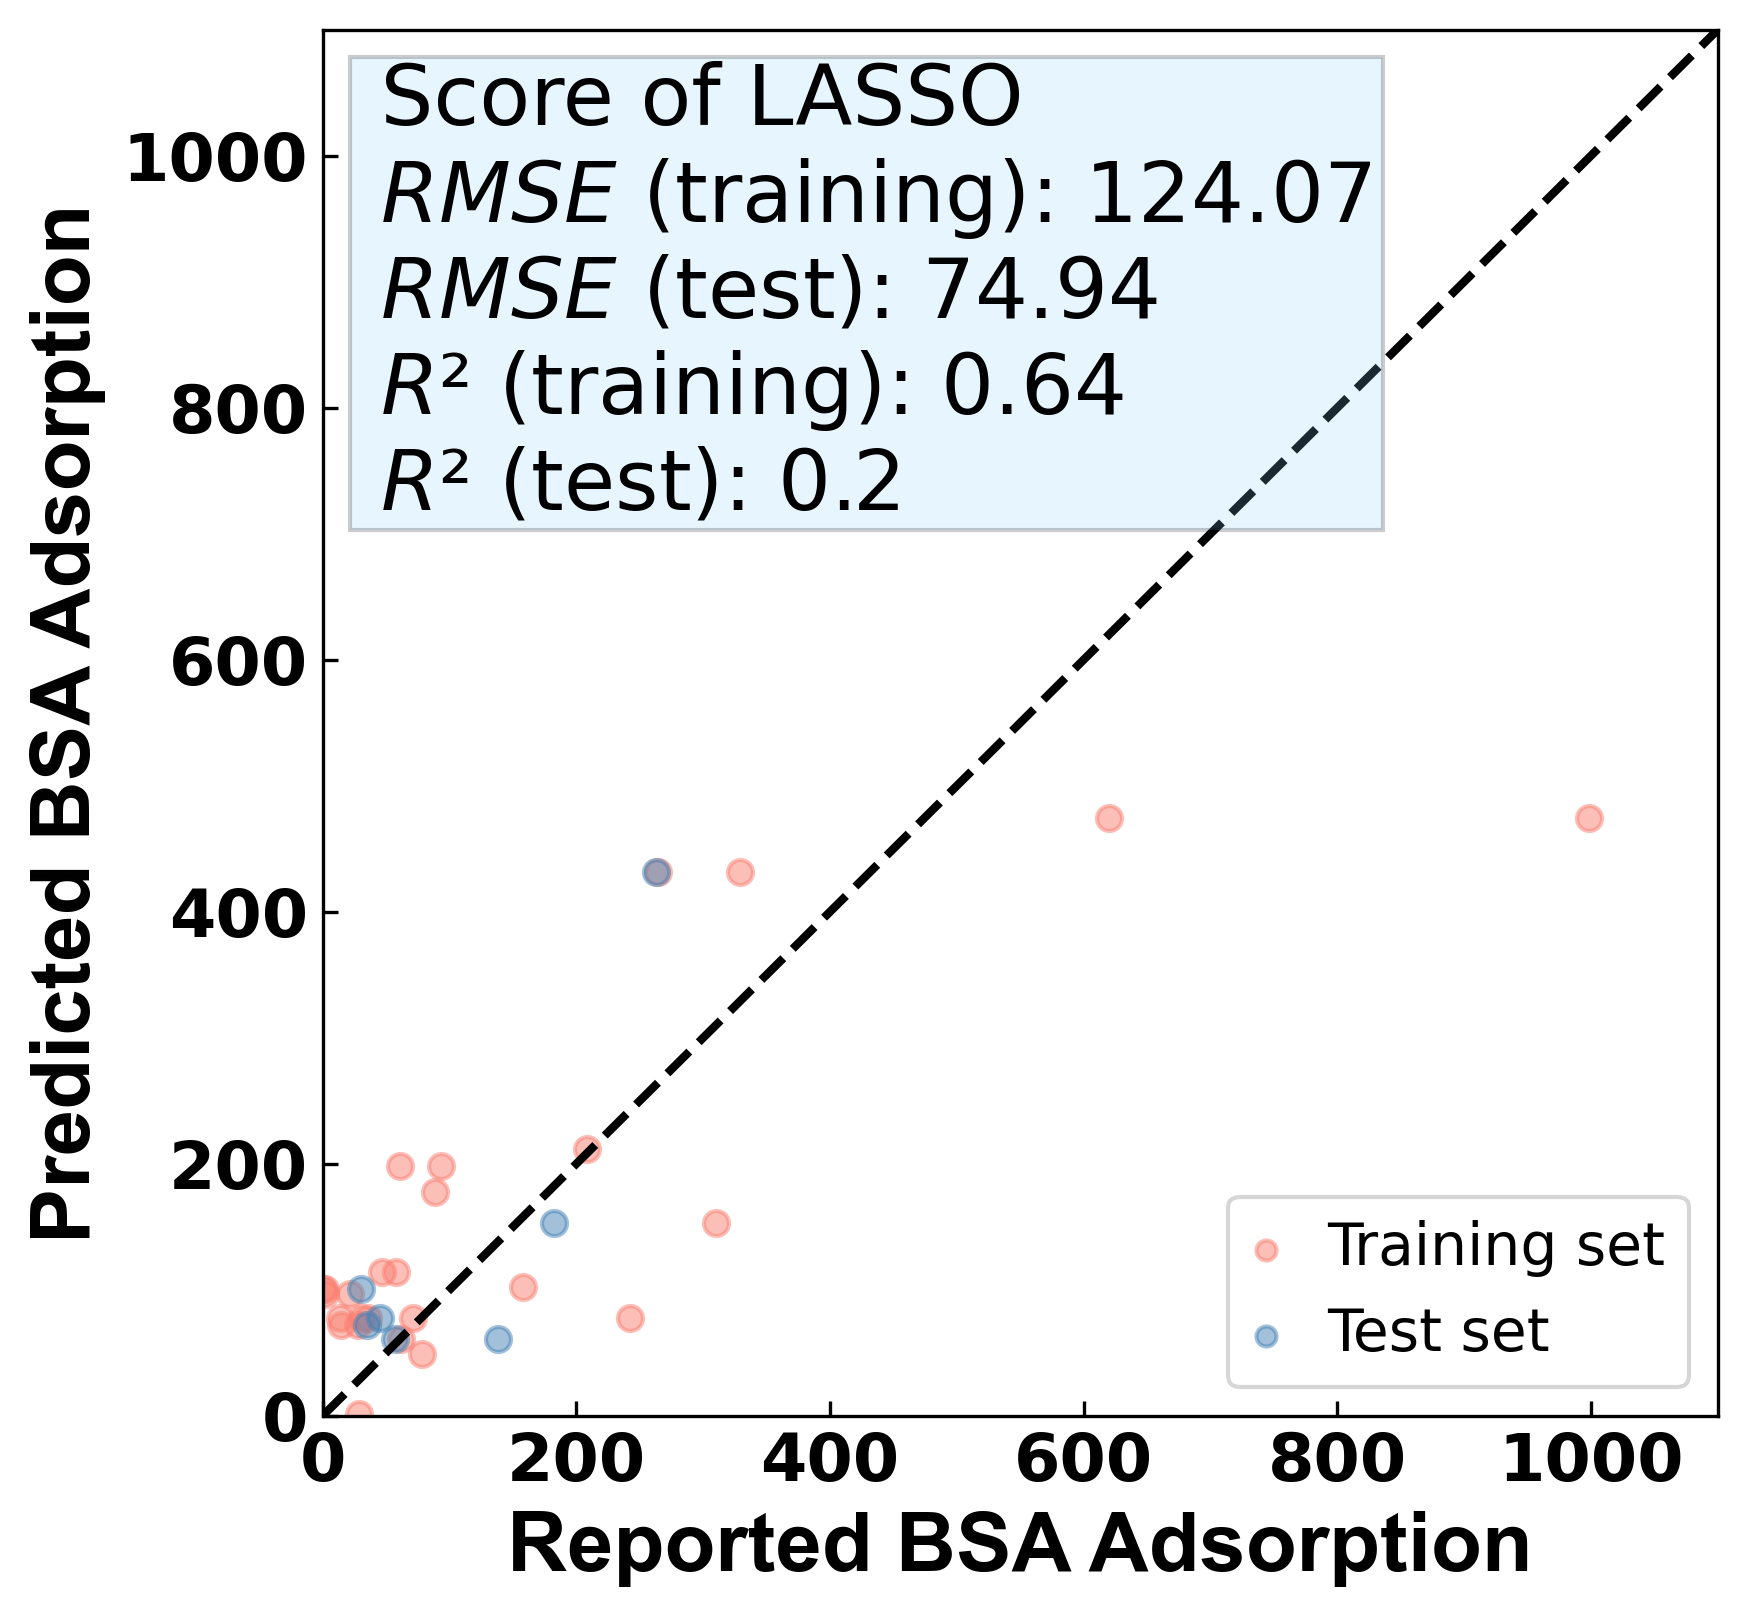

<Figure size 640x480 with 0 Axes>

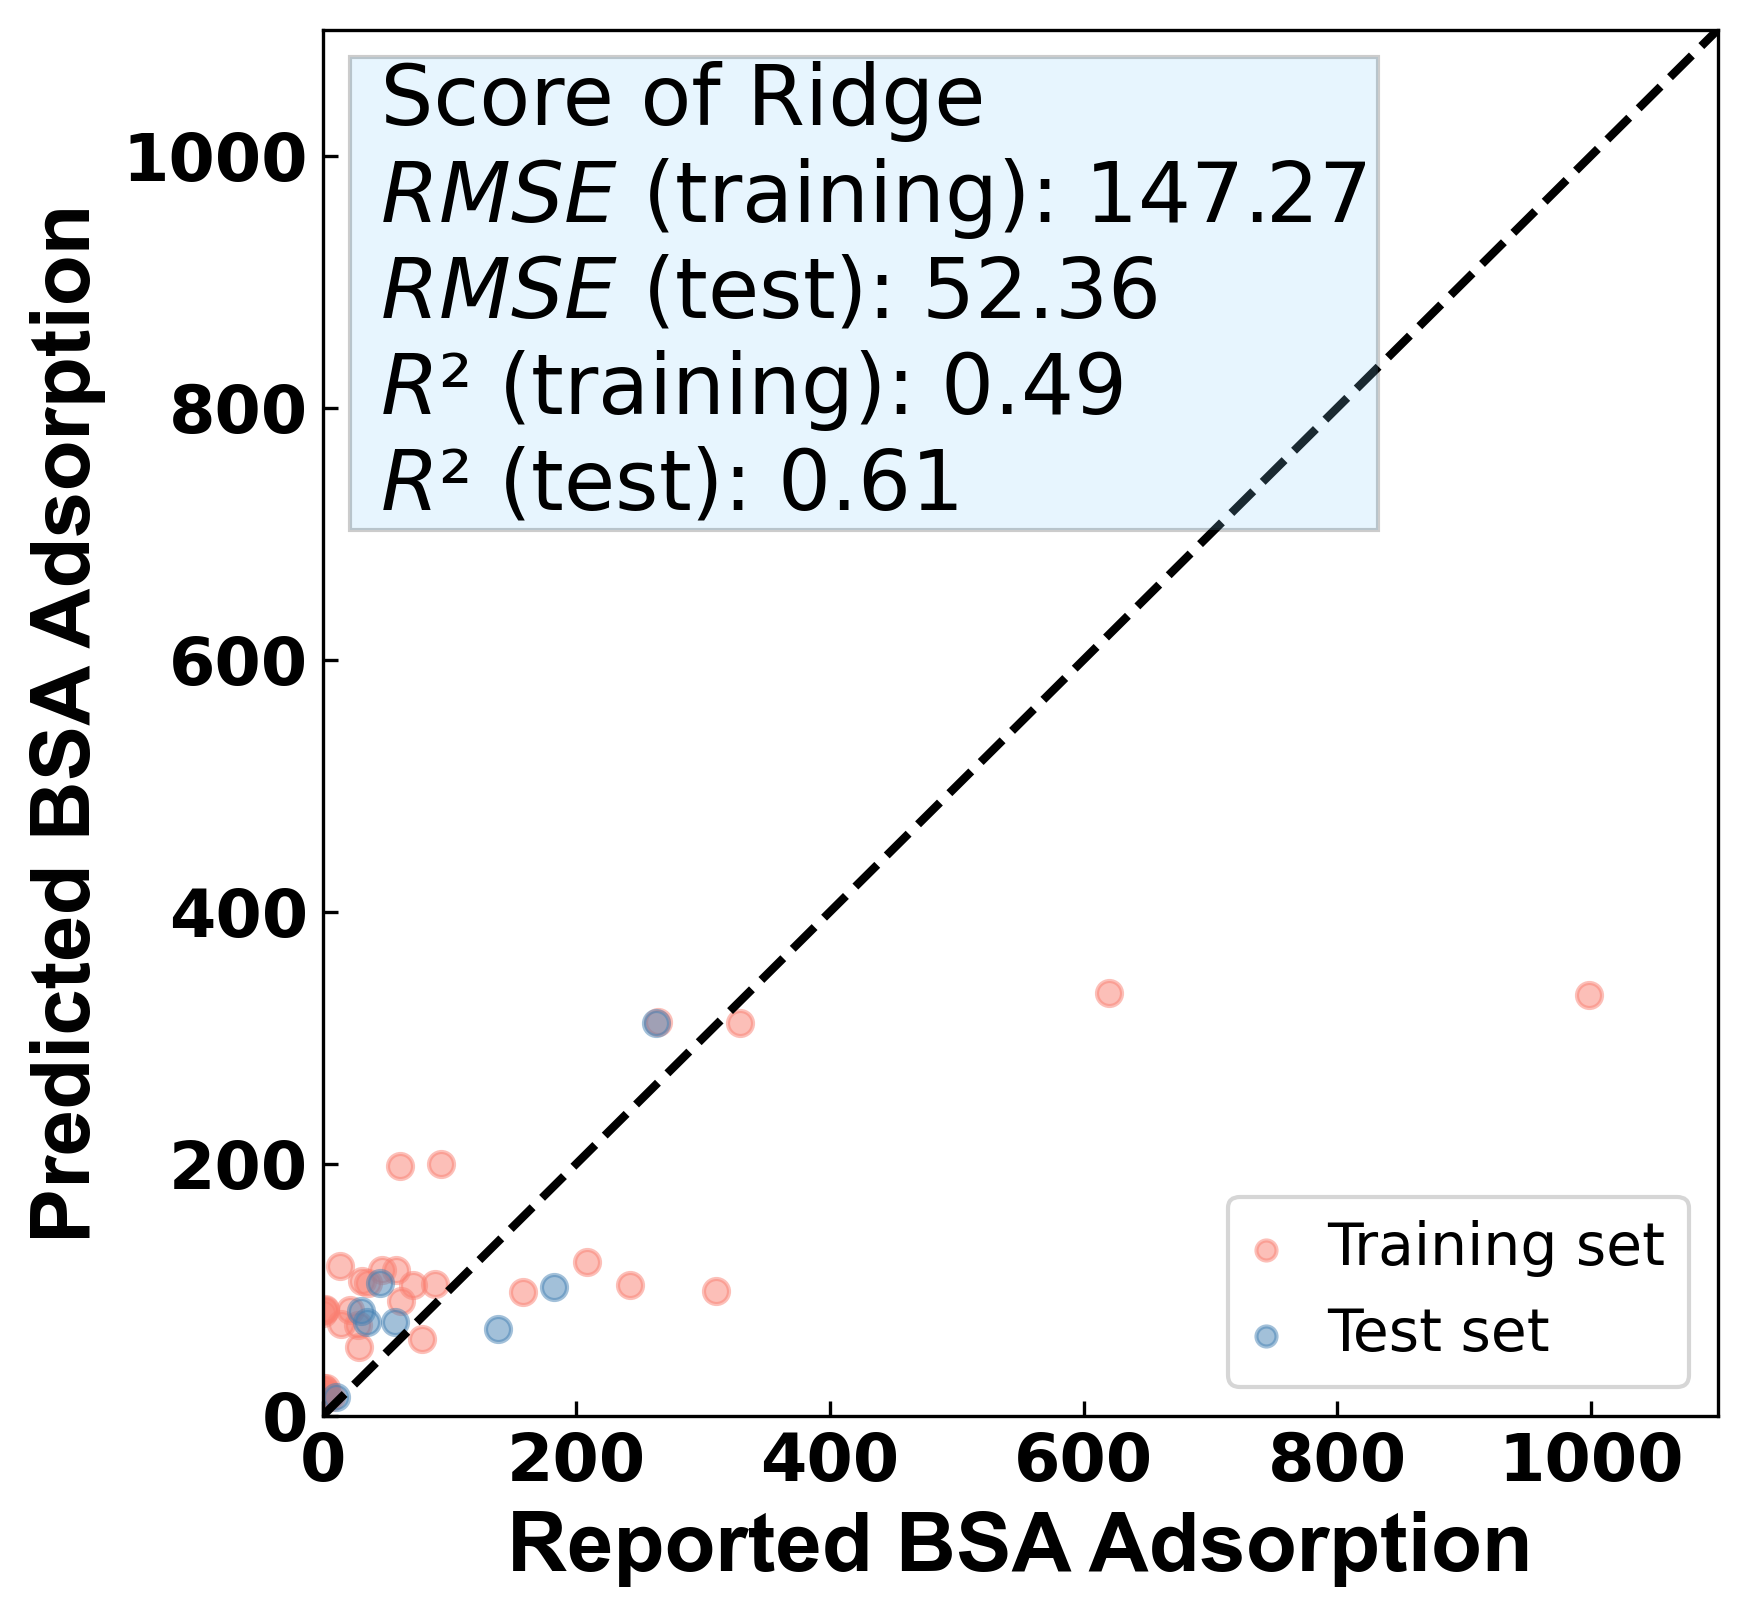

<Figure size 640x480 with 0 Axes>

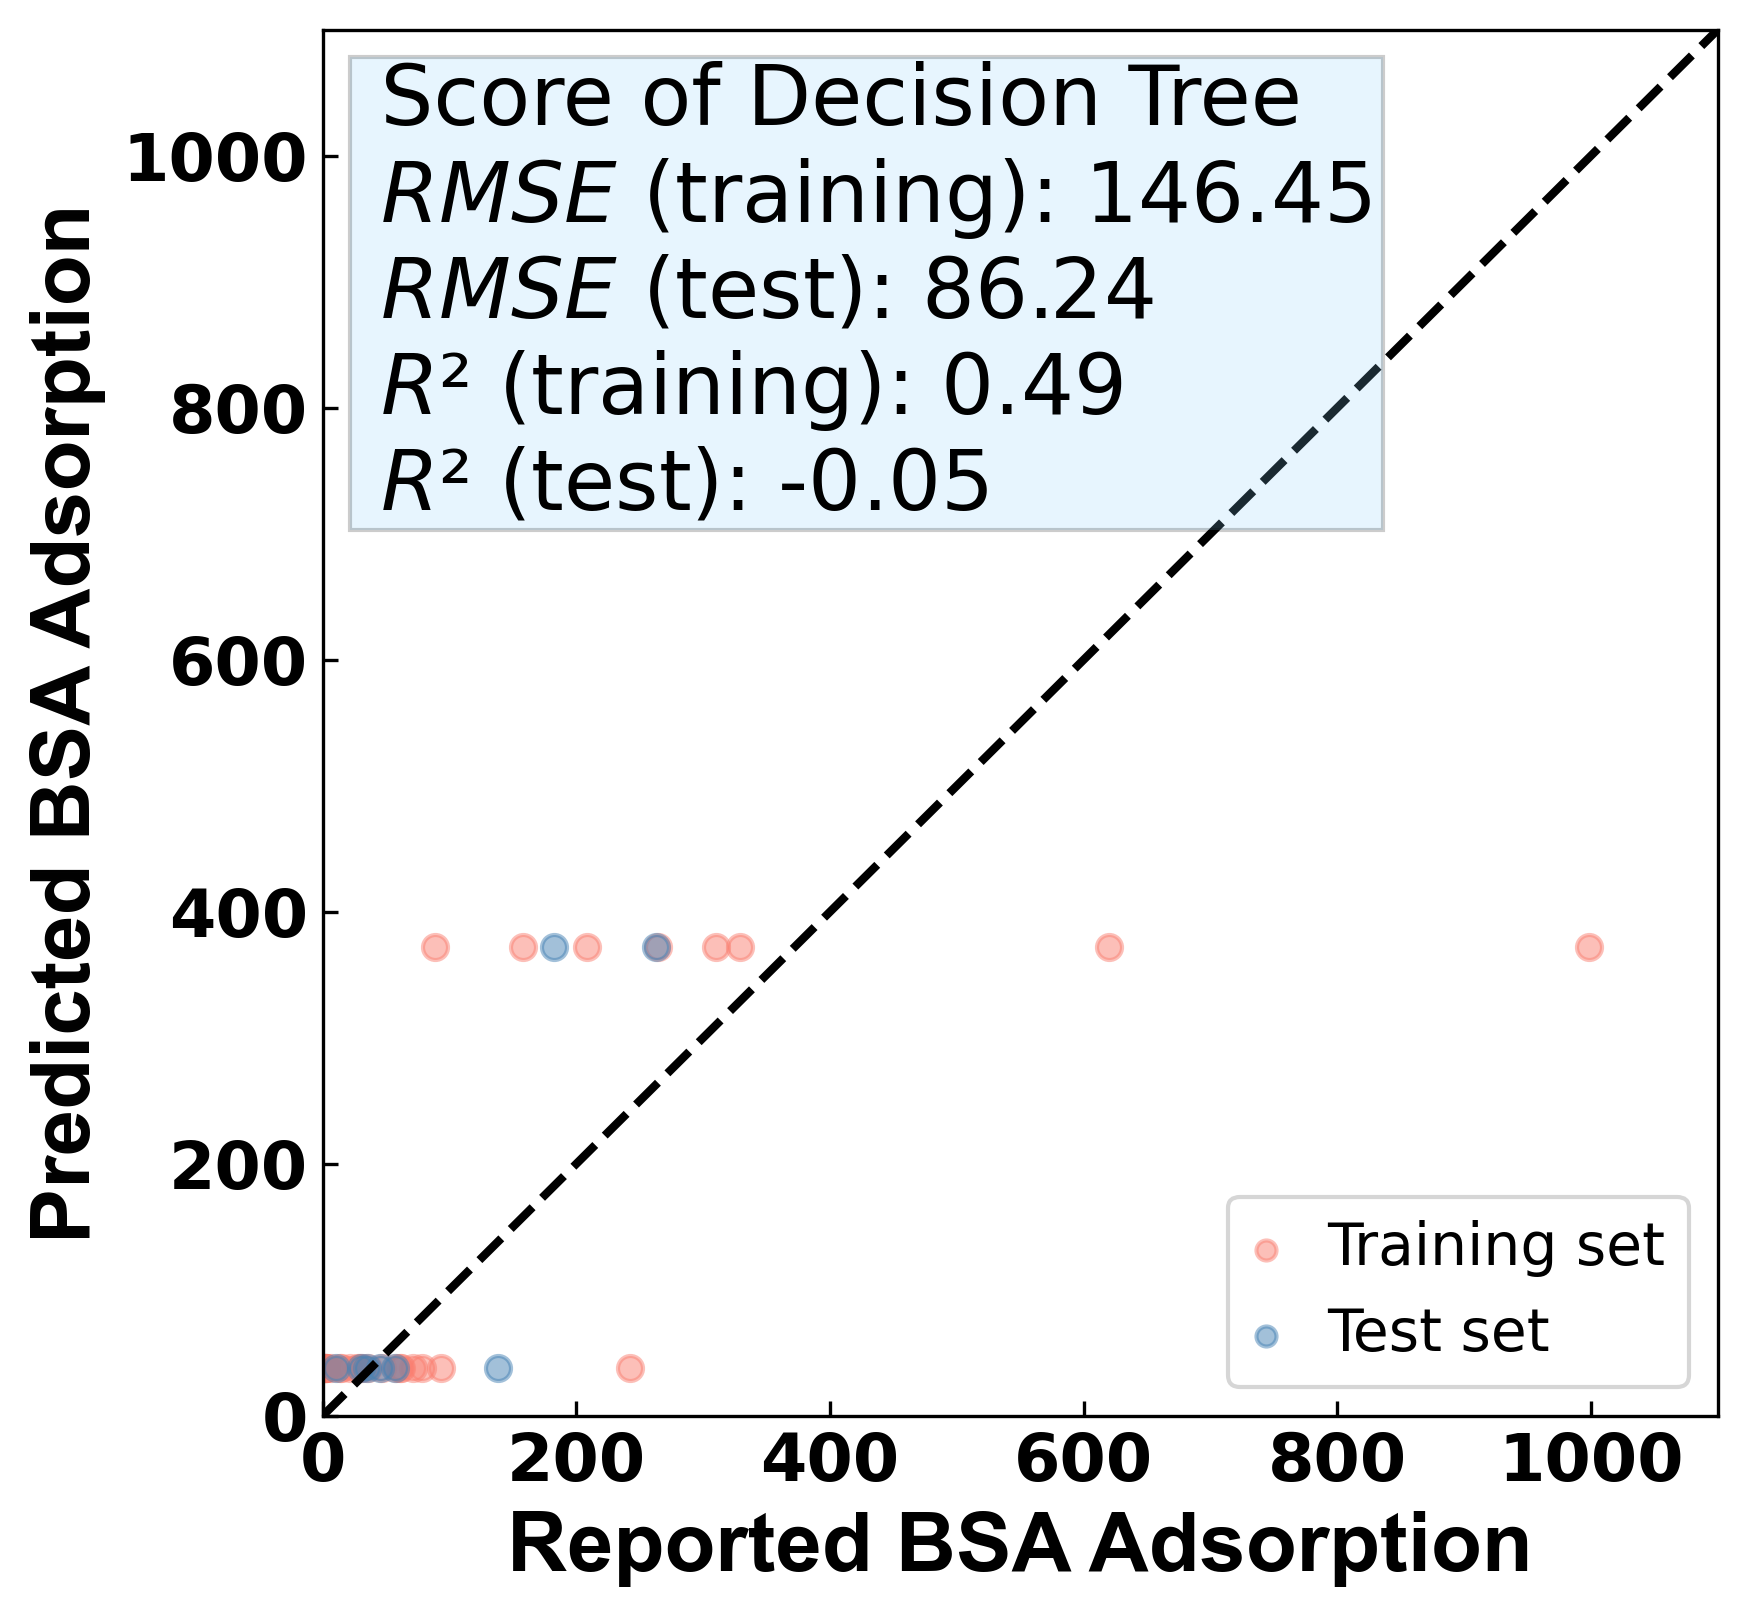

<Figure size 640x480 with 0 Axes>

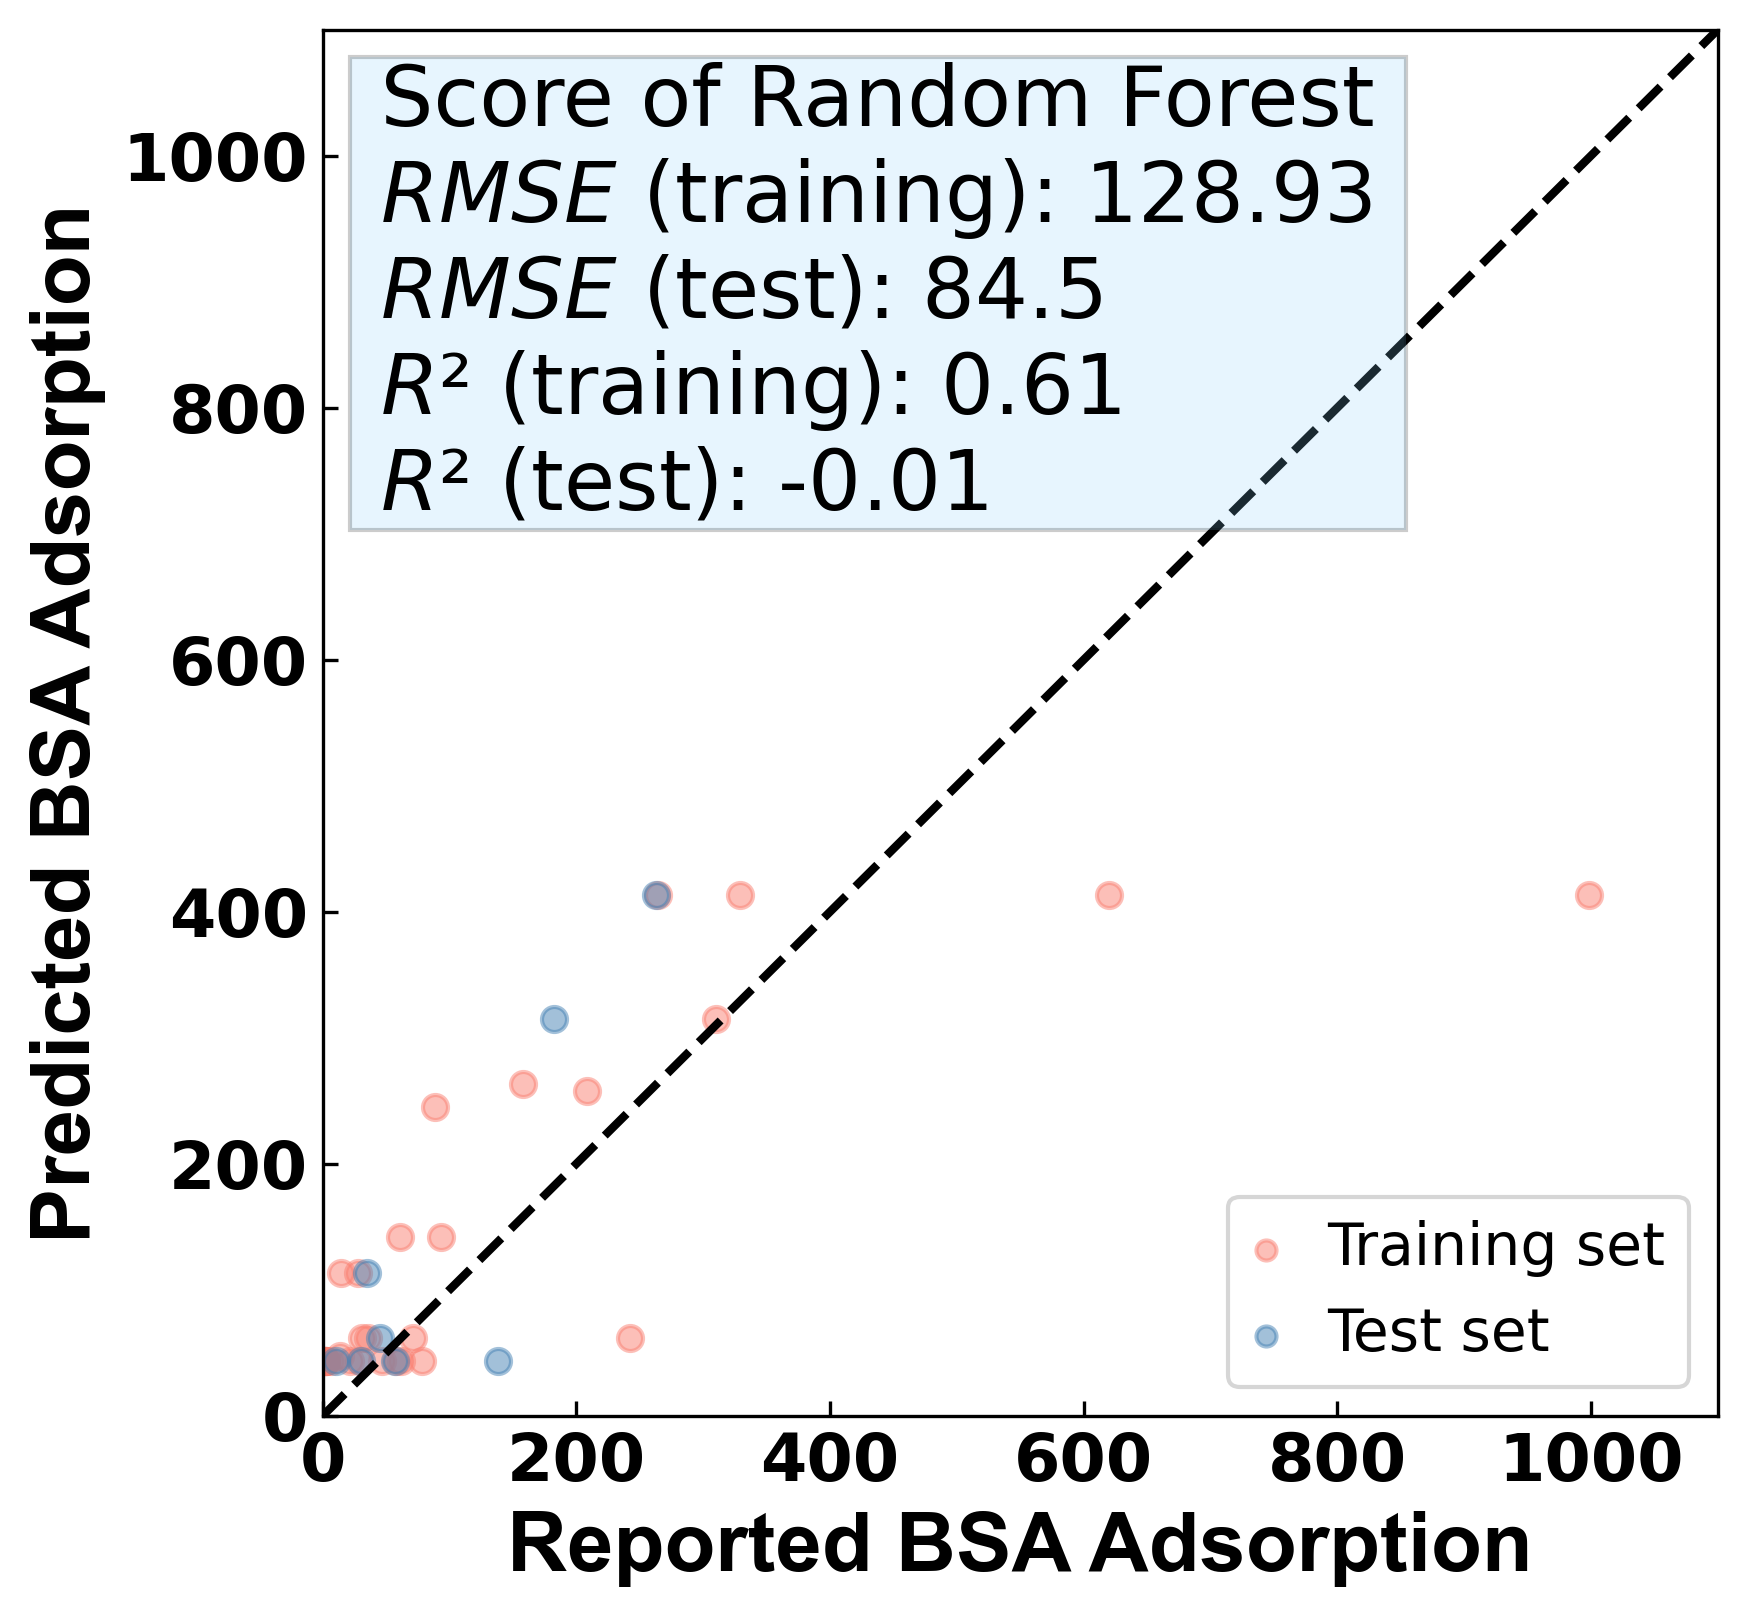

<Figure size 640x480 with 0 Axes>

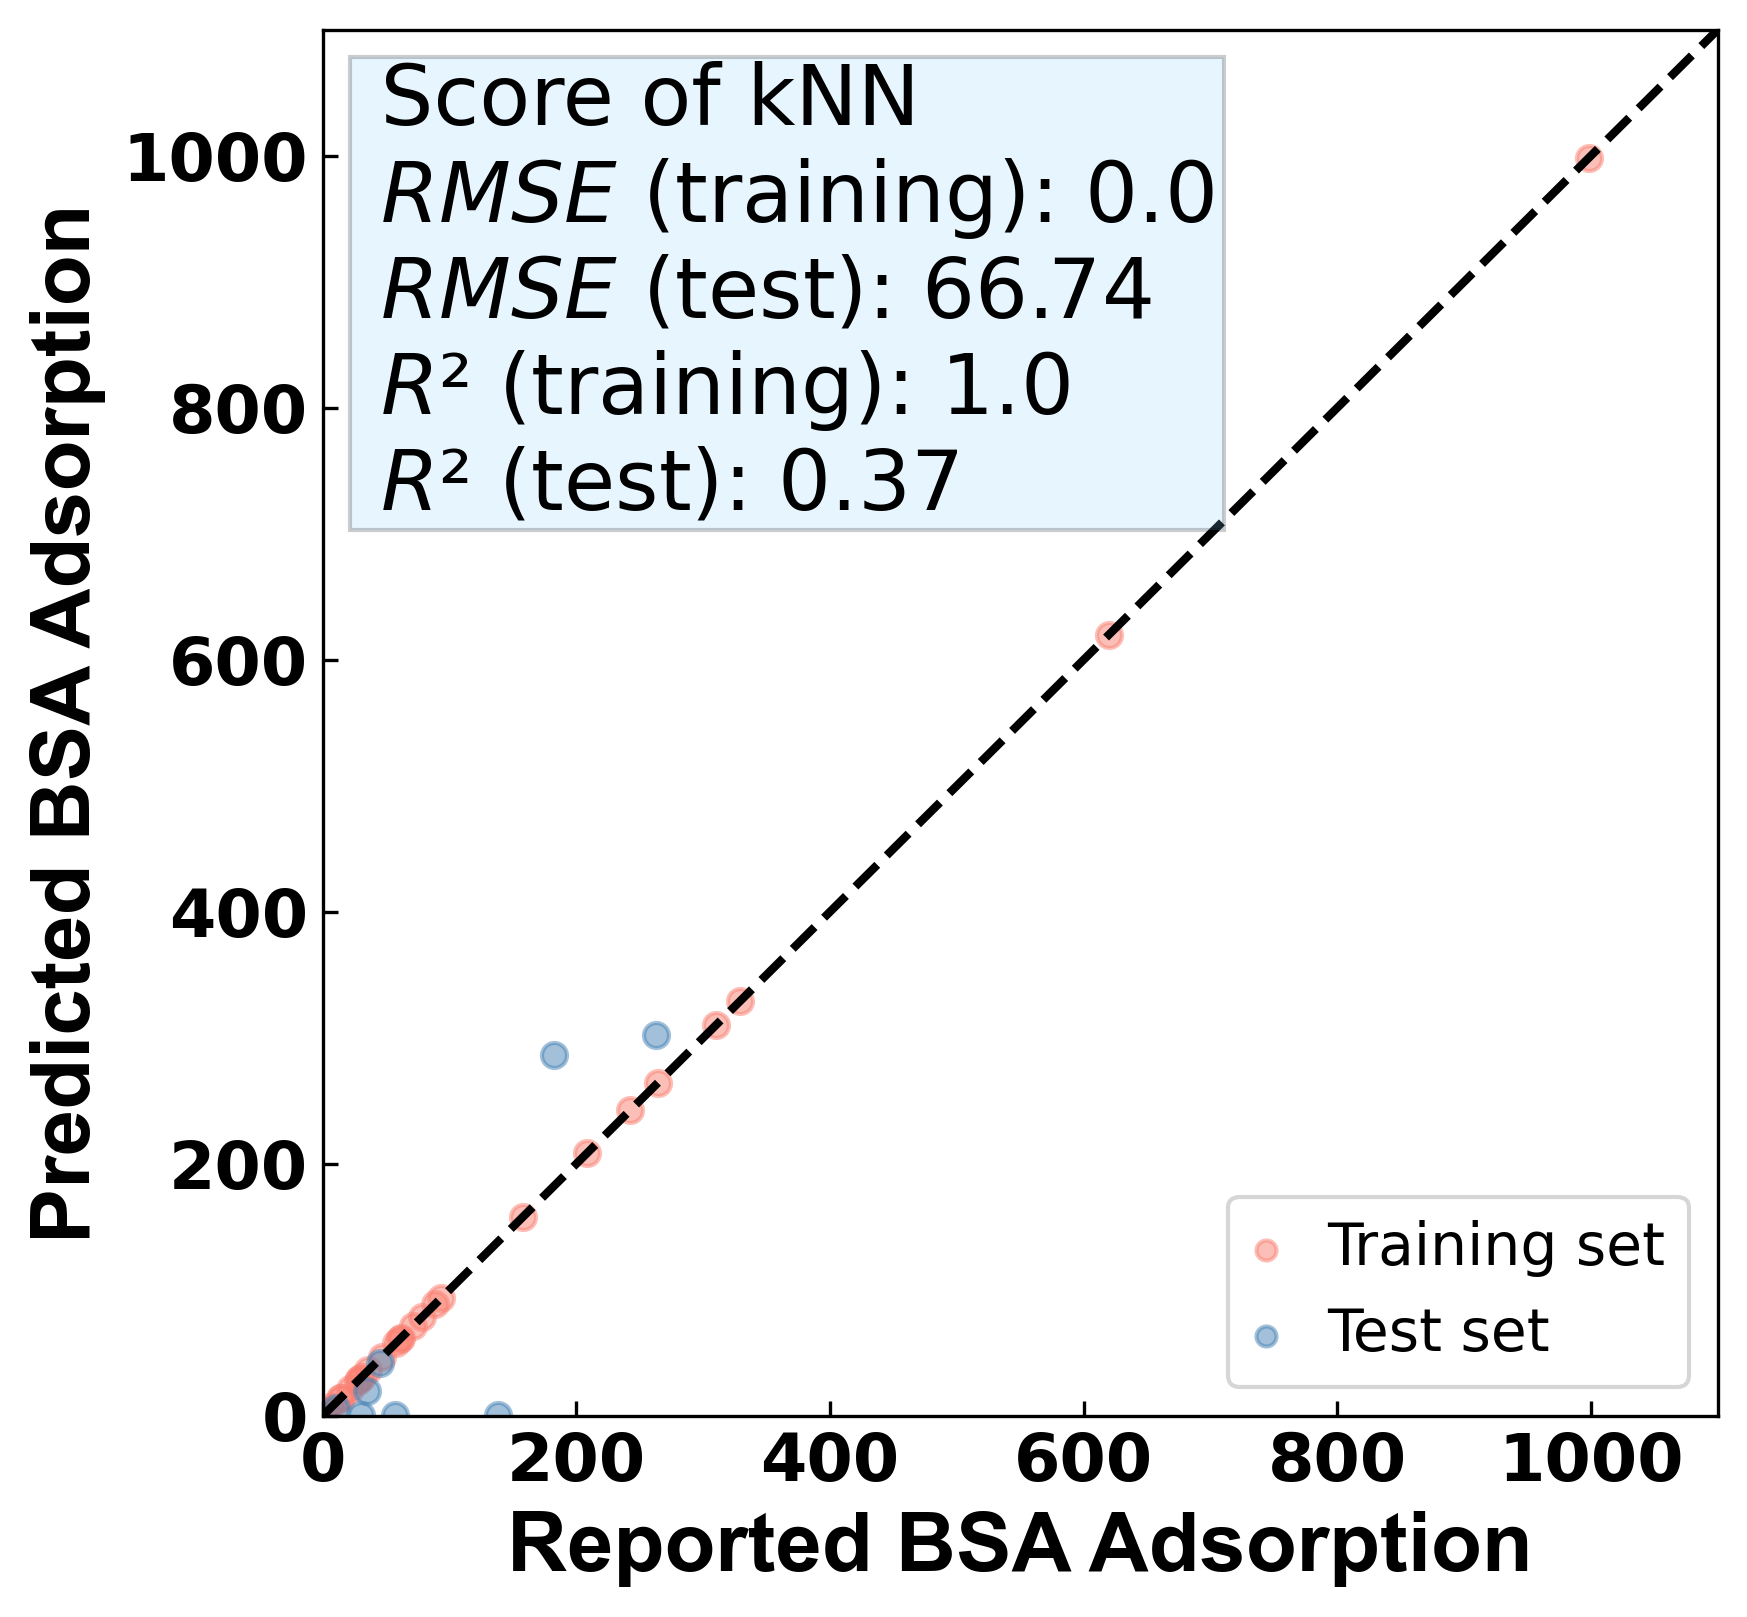

<Figure size 640x480 with 0 Axes>

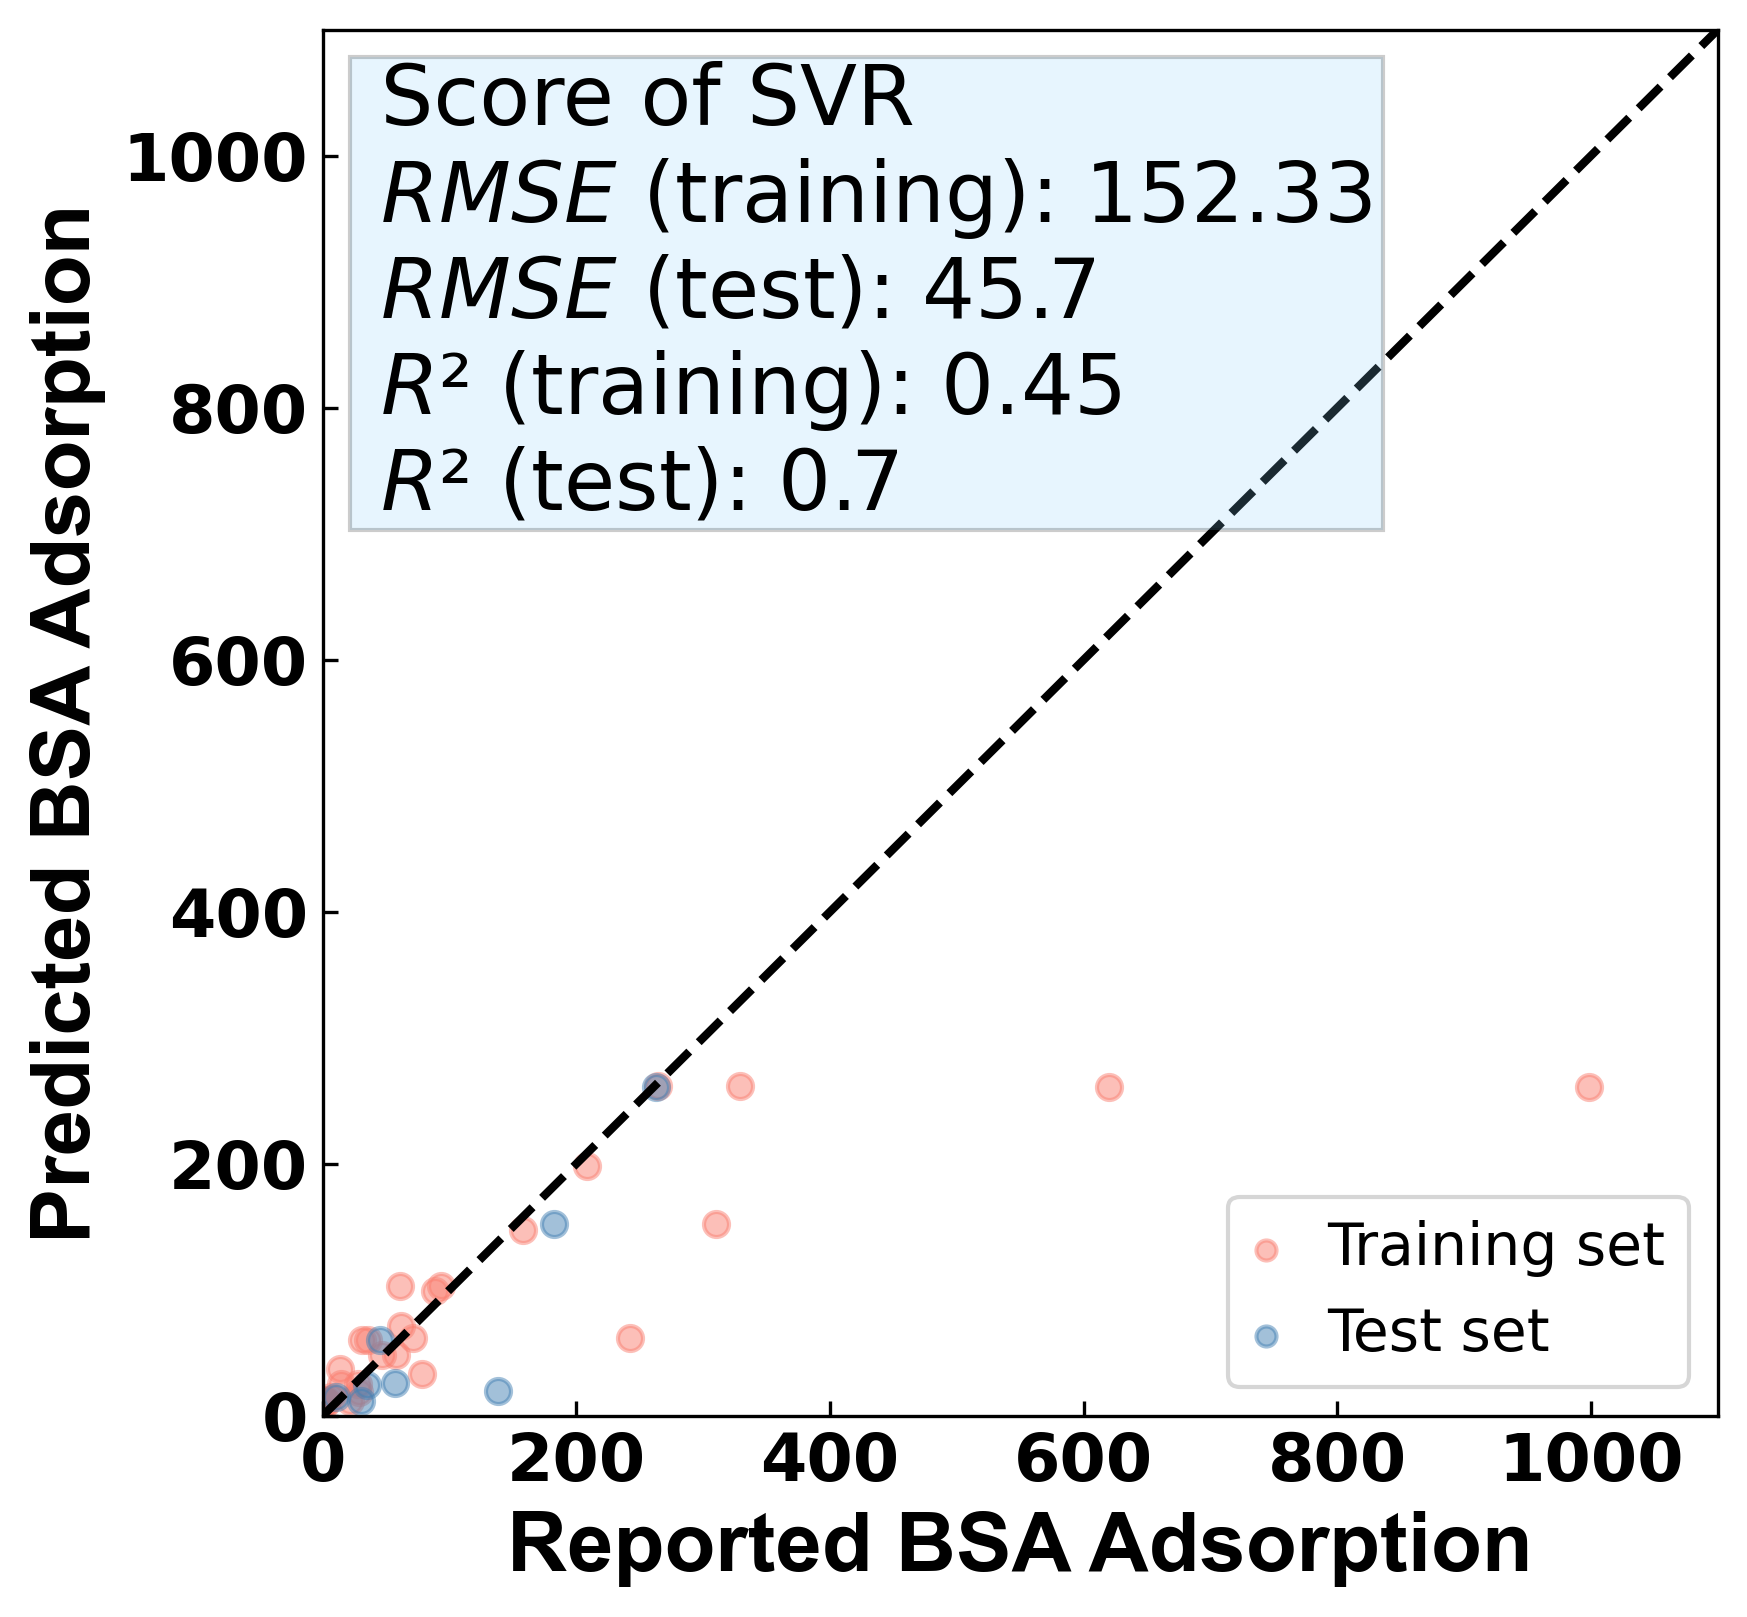

<Figure size 640x480 with 0 Axes>

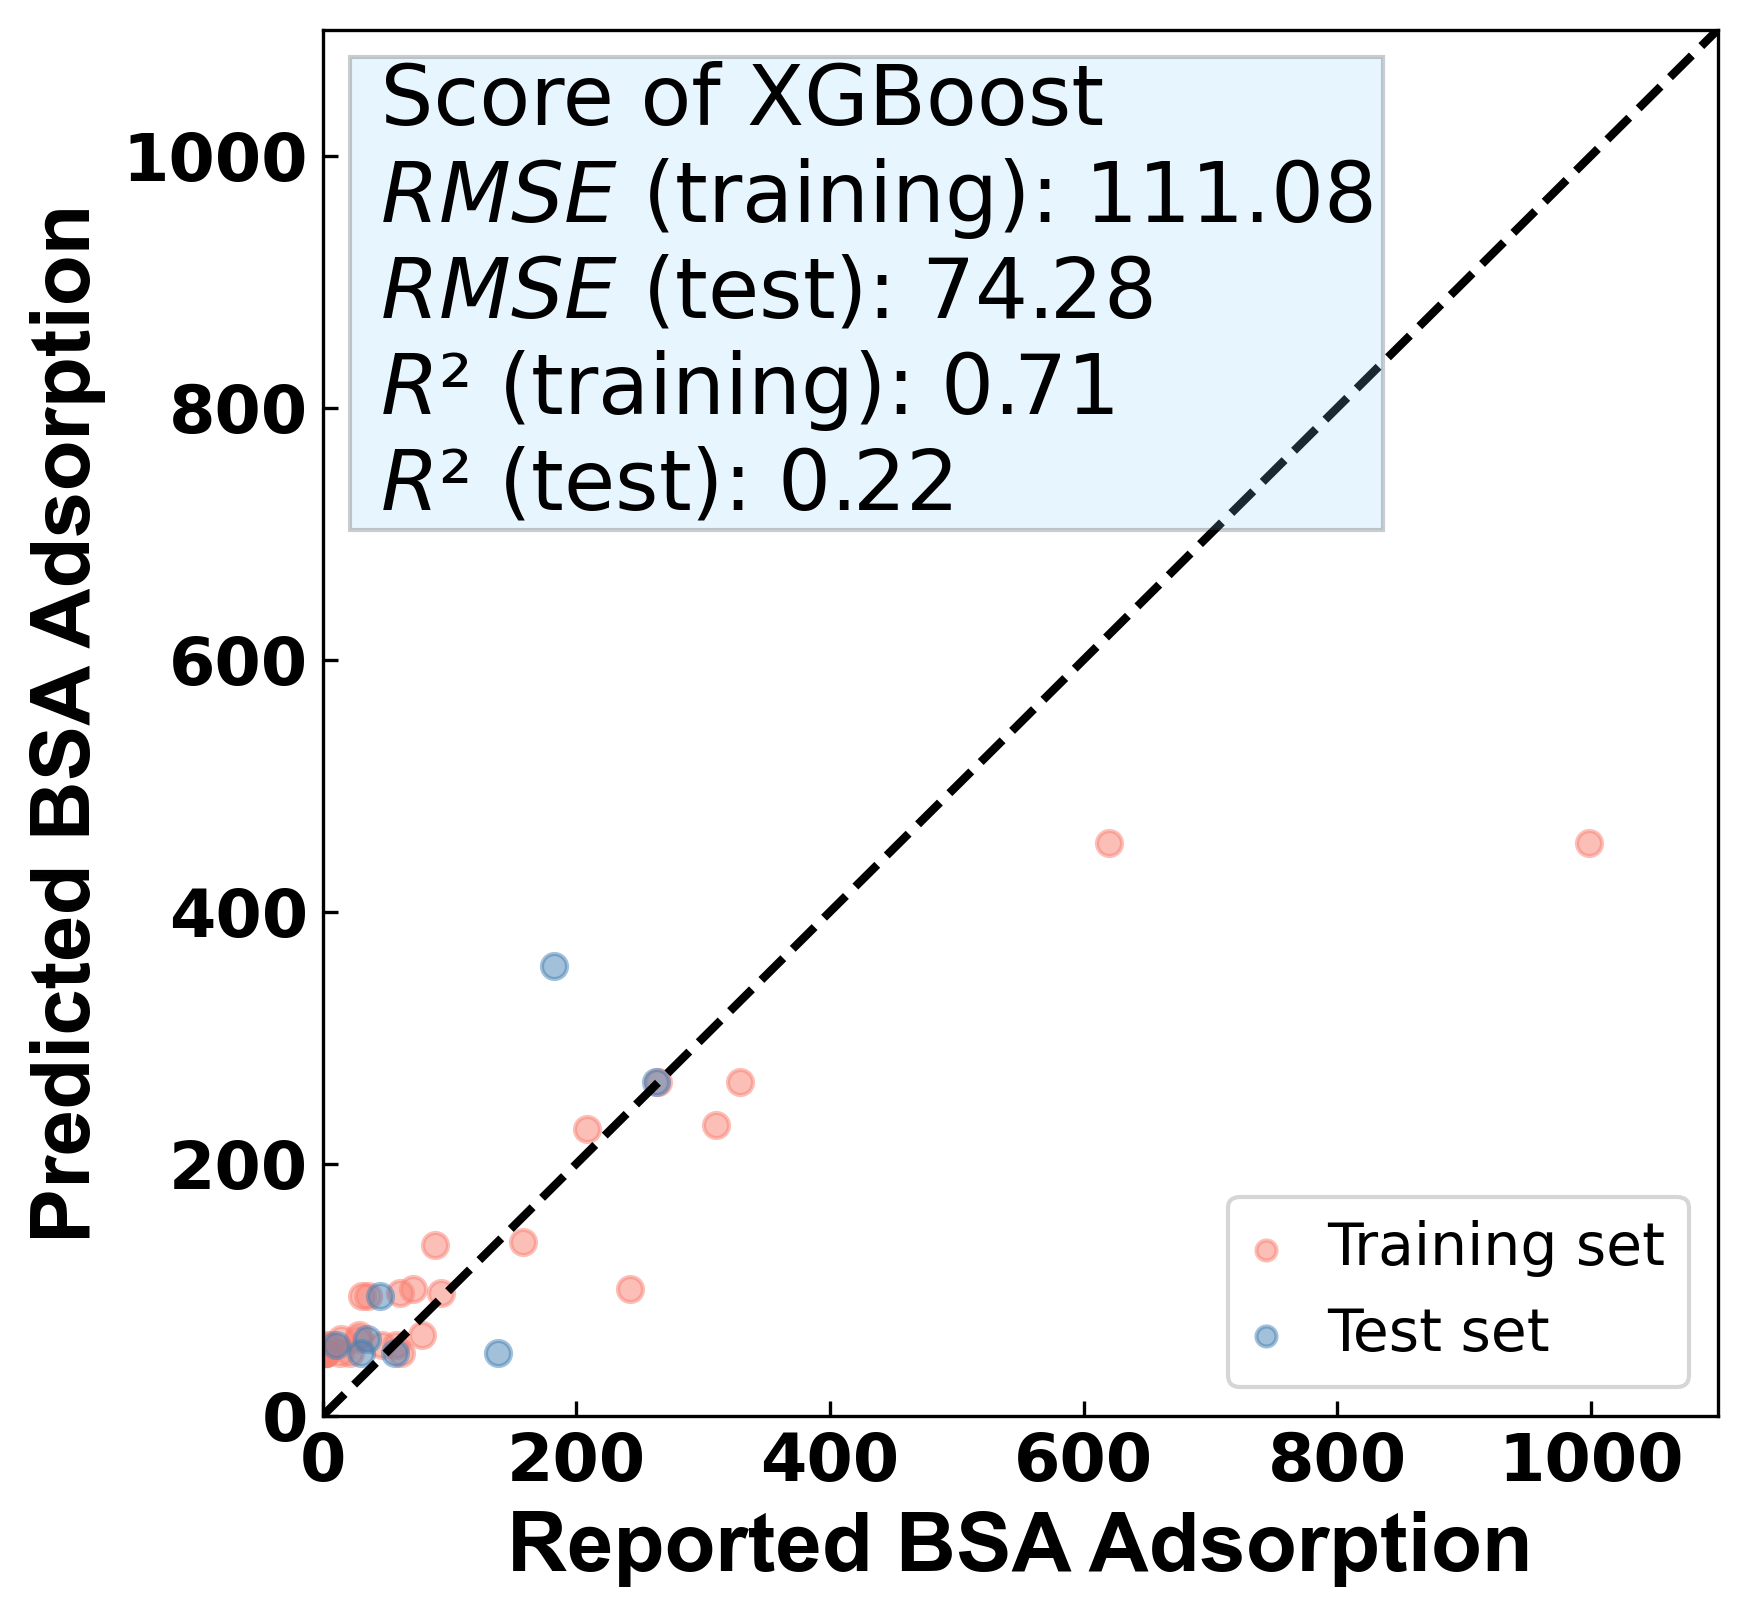

<Figure size 640x480 with 0 Axes>

In [31]:
models_name = ["LASSO", "Ridge", "Decision Tree", "Random Forest", "kNN", "SVR", "XGBoost"]

for i in range(len(trained_models_a)):
    result_show(trained_models_a[i], models_name[i], X_part_a, Y_part_array, X_val_a, Y_val_array)

model_output = "margin" has been renamed to model_output = "raw"
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


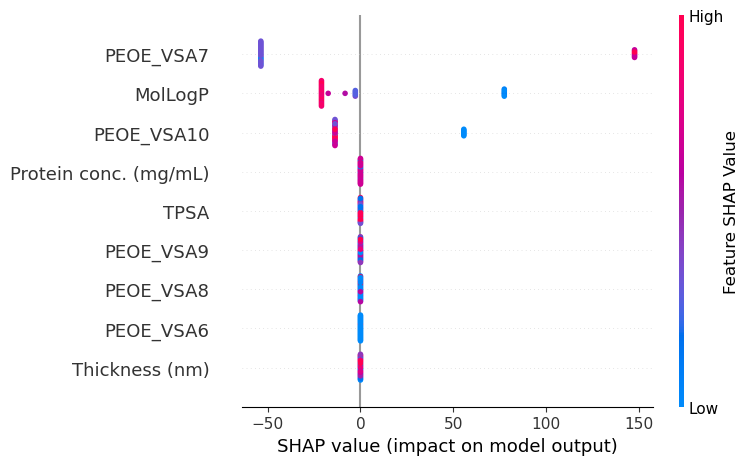

In [32]:
explainer = shap.TreeExplainer(model=trained_models_a[3],
                                feature_perturbation='tree_path_dependent',
                                model_output='margin')
shap_values = explainer.shap_values(X_part_a)
shap.summary_plot(shap_values, X_part_a, feature_names=df_a.columns.values, plot_size=(8,5), color_bar_label="Feature SHAP Value", auto_size_plot=None)

Predicted CA & Zeta

In [33]:
selected_b = ["Thickness (nm)", "Predicted Zeta (mV)", "Predicted CA (deg)",
              "Protein conc. (mg/mL)"]
df_b = df[selected_b]

df_b.head()

Thickness (nm)  Predicted Zeta (mV)  Predicted CA (deg)  \
53          13.800            16.319553           16.000903   
54          16.600             8.157993           39.725957   
55          19.500             7.166369           65.901976   
56          11.962           -18.940662           81.844615   
57          16.822           -12.367573           47.561973   

    Protein conc. (mg/mL)  
53                    1.0  
54                    1.0  
55                    1.0  
56                    1.0  
57                    1.0

In [34]:
scaler = MaxAbsScaler()
X_b = scaler.fit_transform(df_b)
X_b = np.array(X_b)

Y = np.array(df_label)

X_part_b, X_val_b, Y_part_array, Y_val_array = train_test_split(X_b, Y, test_size=0.2, random_state=42)


In [35]:
param_lasso = {"alpha": np.arange(0.05, 3., 0.01),
              "fit_intercept": [True, False]}

param_ridge = {"alpha": np.arange(0.05, 3., 0.01),
              "fit_intercept": [True, False]}

param_tree = {"max_depth": np.arange(1, 10),
             "min_samples_leaf": np.arange(1, 10, 1),
             "random_state": [42]}

param_forest = {"max_depth": np.arange(1, 10),
             "min_samples_leaf": np.arange(1, 5, 1),
             "n_estimators": [50, 75, 100, 125, 150, 250, 500],
             "random_state": [42]}

param_knn = {"n_neighbors": np.arange(1, 15),
              "weights": ["uniform", "distance"]}

param_svr = {"C": [0.1, 1, 10, 100, 1000],
              "epsilon": [0.01, 0.1, 1, 10],
              "kernel": ["linear", "poly", "rbf", "sigmoid"]}

param_xgb = {"max_depth": np.arange(1, 20),
             "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
             "n_estimators": [50, 75, 100, 125, 150, 250, 500],
             "random_state": [42]}

models_param = {
    "Lasso": {"model": Lasso(), "param": param_lasso},
    "Ridge": {"model": Ridge(), "param": param_ridge},
    "Decision Tree": {"model": DecisionTreeRegressor(), "param": param_tree},
    "Random Forest": {"model": RandomForestRegressor(), "param": param_forest},
    "kNN": {"model": KNeighborsRegressor(), "param": param_knn},
    "SVR": {"model": SVR(), "param": param_svr},
    "XGBoost": {"model": XGBRegressor(), "param": param_xgb}
}

optimized_models = {"Lasso":{"scores":[]},
                    "Ridge":{"scores":[]},
                    "Decision Tree":{"scores":[]},
                    "Random Forest":{"scores":[]},
                    "kNN":{"scores":[]},
                    "SVR":{"scores":[]},
                    "XGBoost":{"scores":[]}}

outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
loo = LeaveOneOut()

In [36]:
trained_models_b = []

for model_name, model_param in models_param.items():
    print("Training "+model_name+"...")
    model = model_param["model"]
    param = model_param["param"]
    
    grid = GridSearchCV(model, param, cv=outer_cv, n_jobs=-1)
    grid.fit(X_part_b, Y_part_array)
    #grid_models_peoe.append(grid)
    print("Best parameters for "+model_name, grid.best_params_)
    model_ = grid.best_estimator_
    # dump(model_peoe, model_name+"_peoe.joblib")
    trained_models_b.append(model_)

    print("-------------------------NEXT-------------------------")

Training Lasso...
Best parameters for Lasso {'alpha': 2.99, 'fit_intercept': True}
-------------------------NEXT-------------------------
Training Ridge...
Best parameters for Ridge {'alpha': 2.99, 'fit_intercept': True}
-------------------------NEXT-------------------------
Training Decision Tree...
Best parameters for Decision Tree {'max_depth': 1, 'min_samples_leaf': 1, 'random_state': 42}
-------------------------NEXT-------------------------
Training Random Forest...
Best parameters for Random Forest {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 100, 'random_state': 42}
-------------------------NEXT-------------------------
Training kNN...
Best parameters for kNN {'n_neighbors': 2, 'weights': 'distance'}
-------------------------NEXT-------------------------
Training SVR...
Best parameters for SVR {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
-------------------------NEXT-------------------------
Training XGBoost...
Best parameters for XGBoost {'learning_rate': 0.3, 'max_d

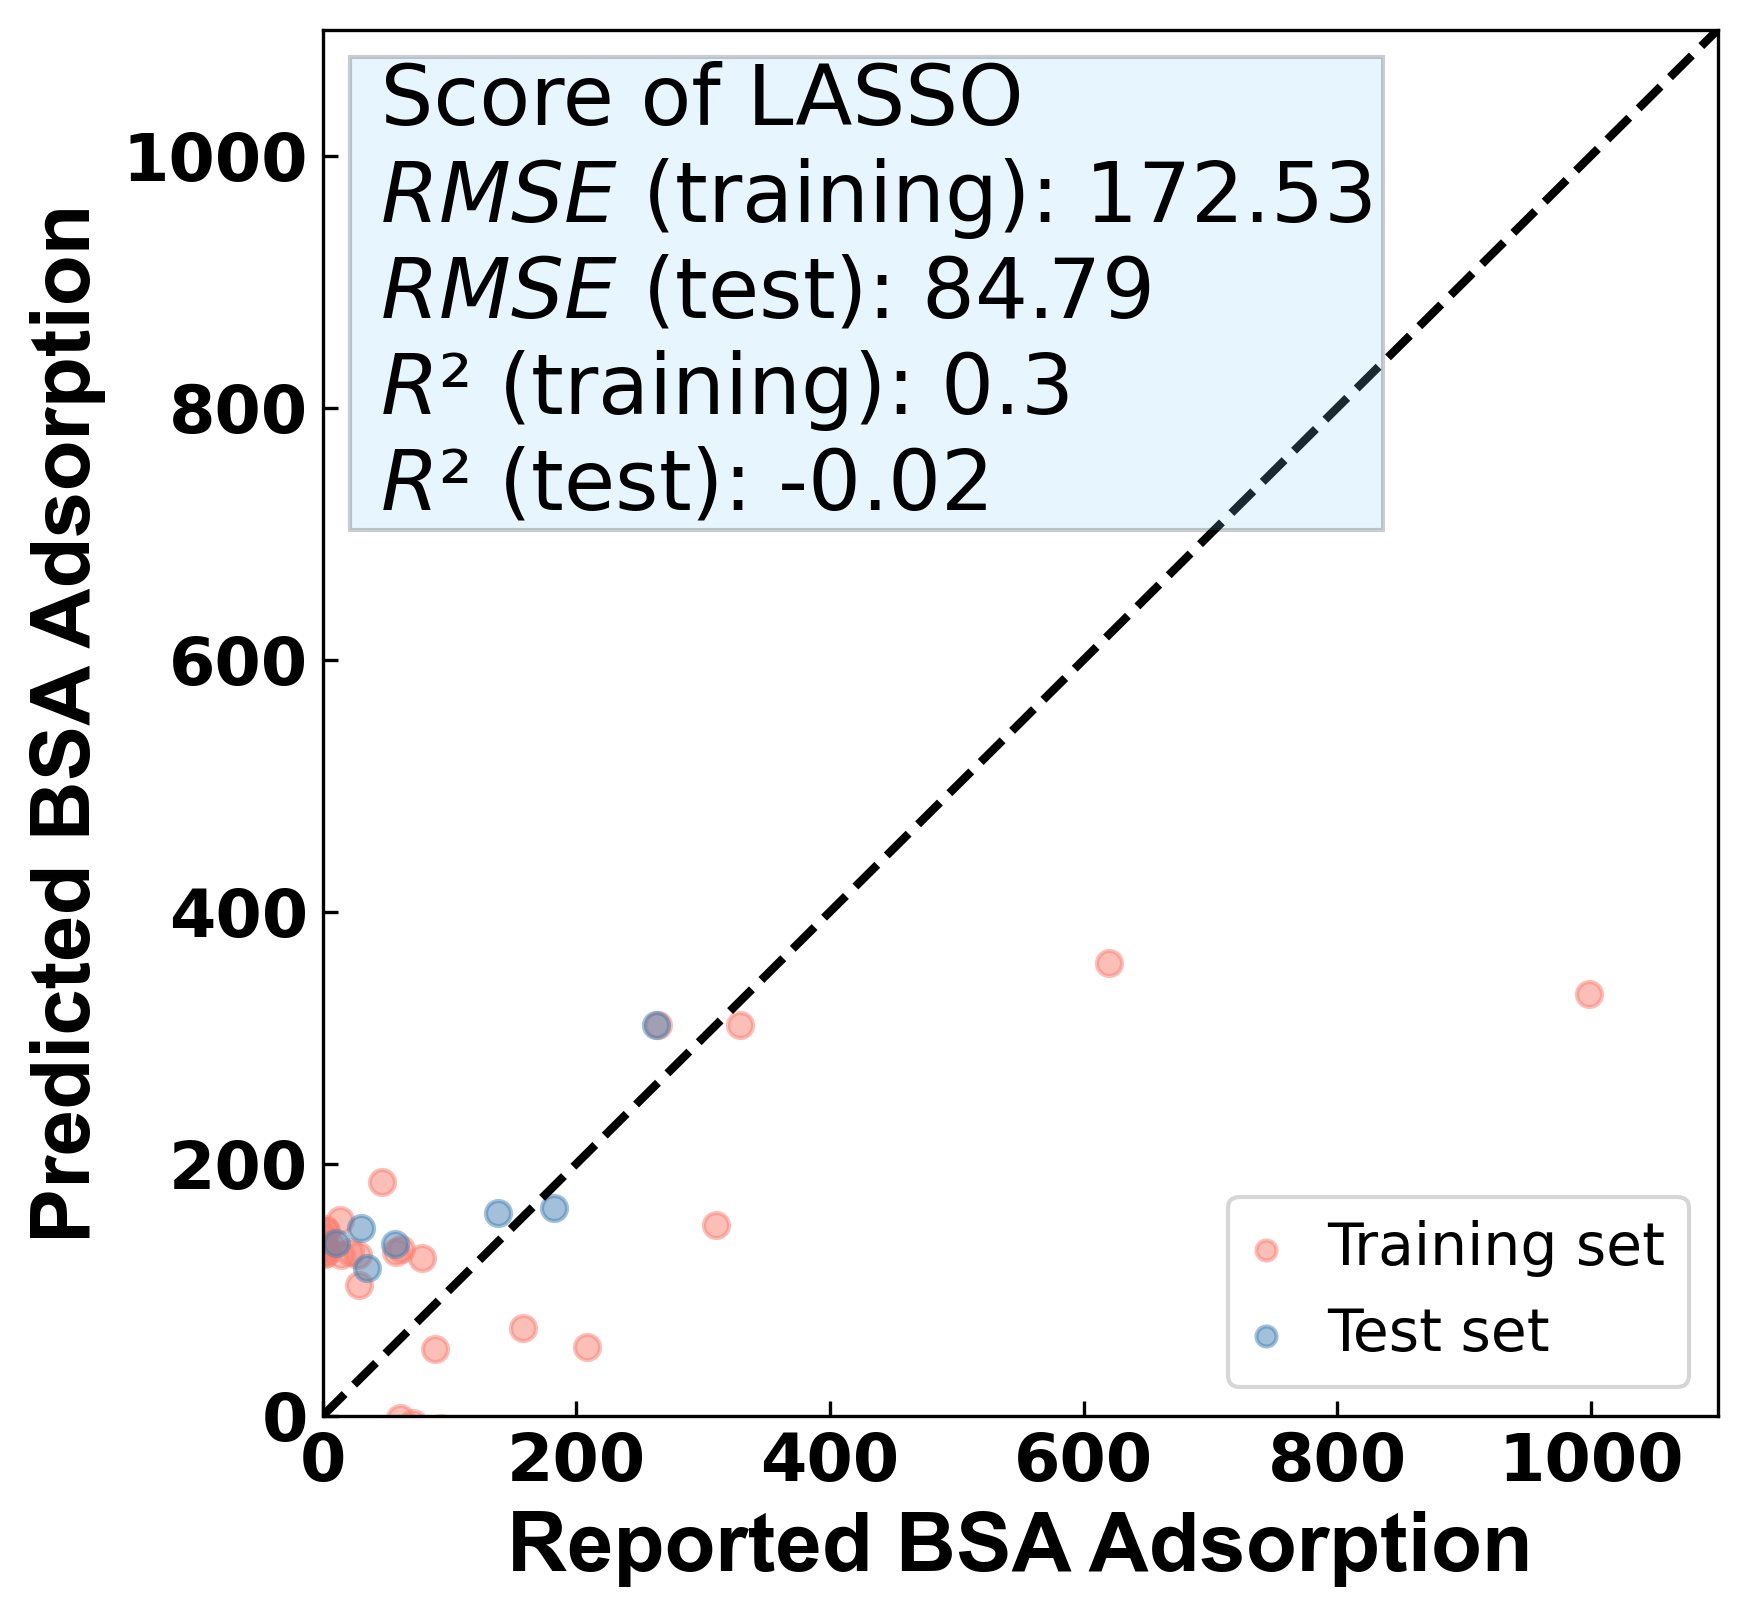

<Figure size 640x480 with 0 Axes>

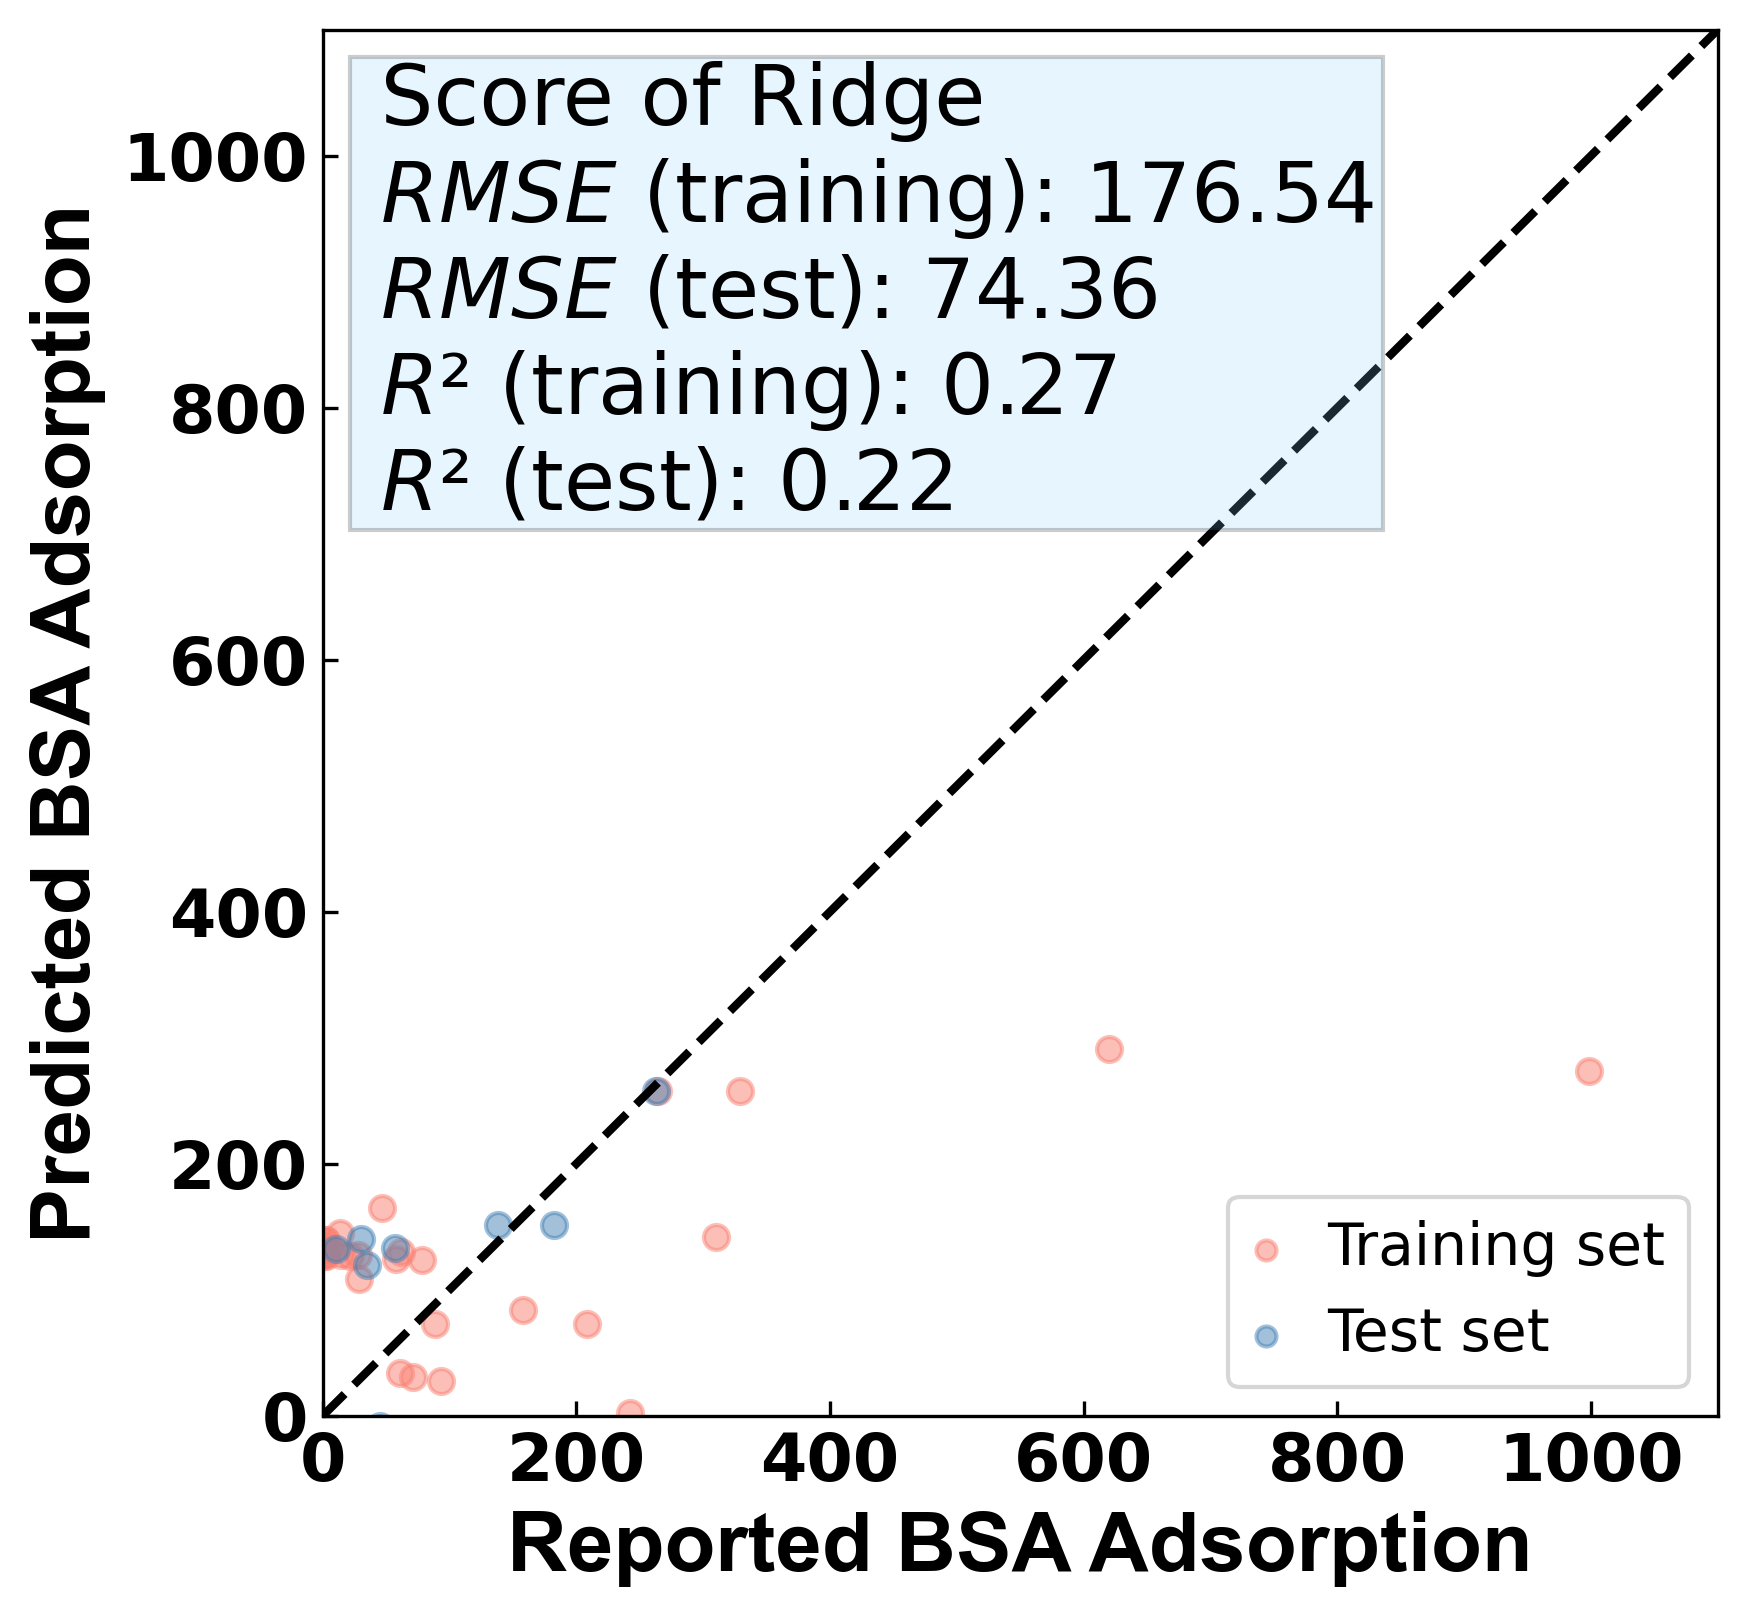

<Figure size 640x480 with 0 Axes>

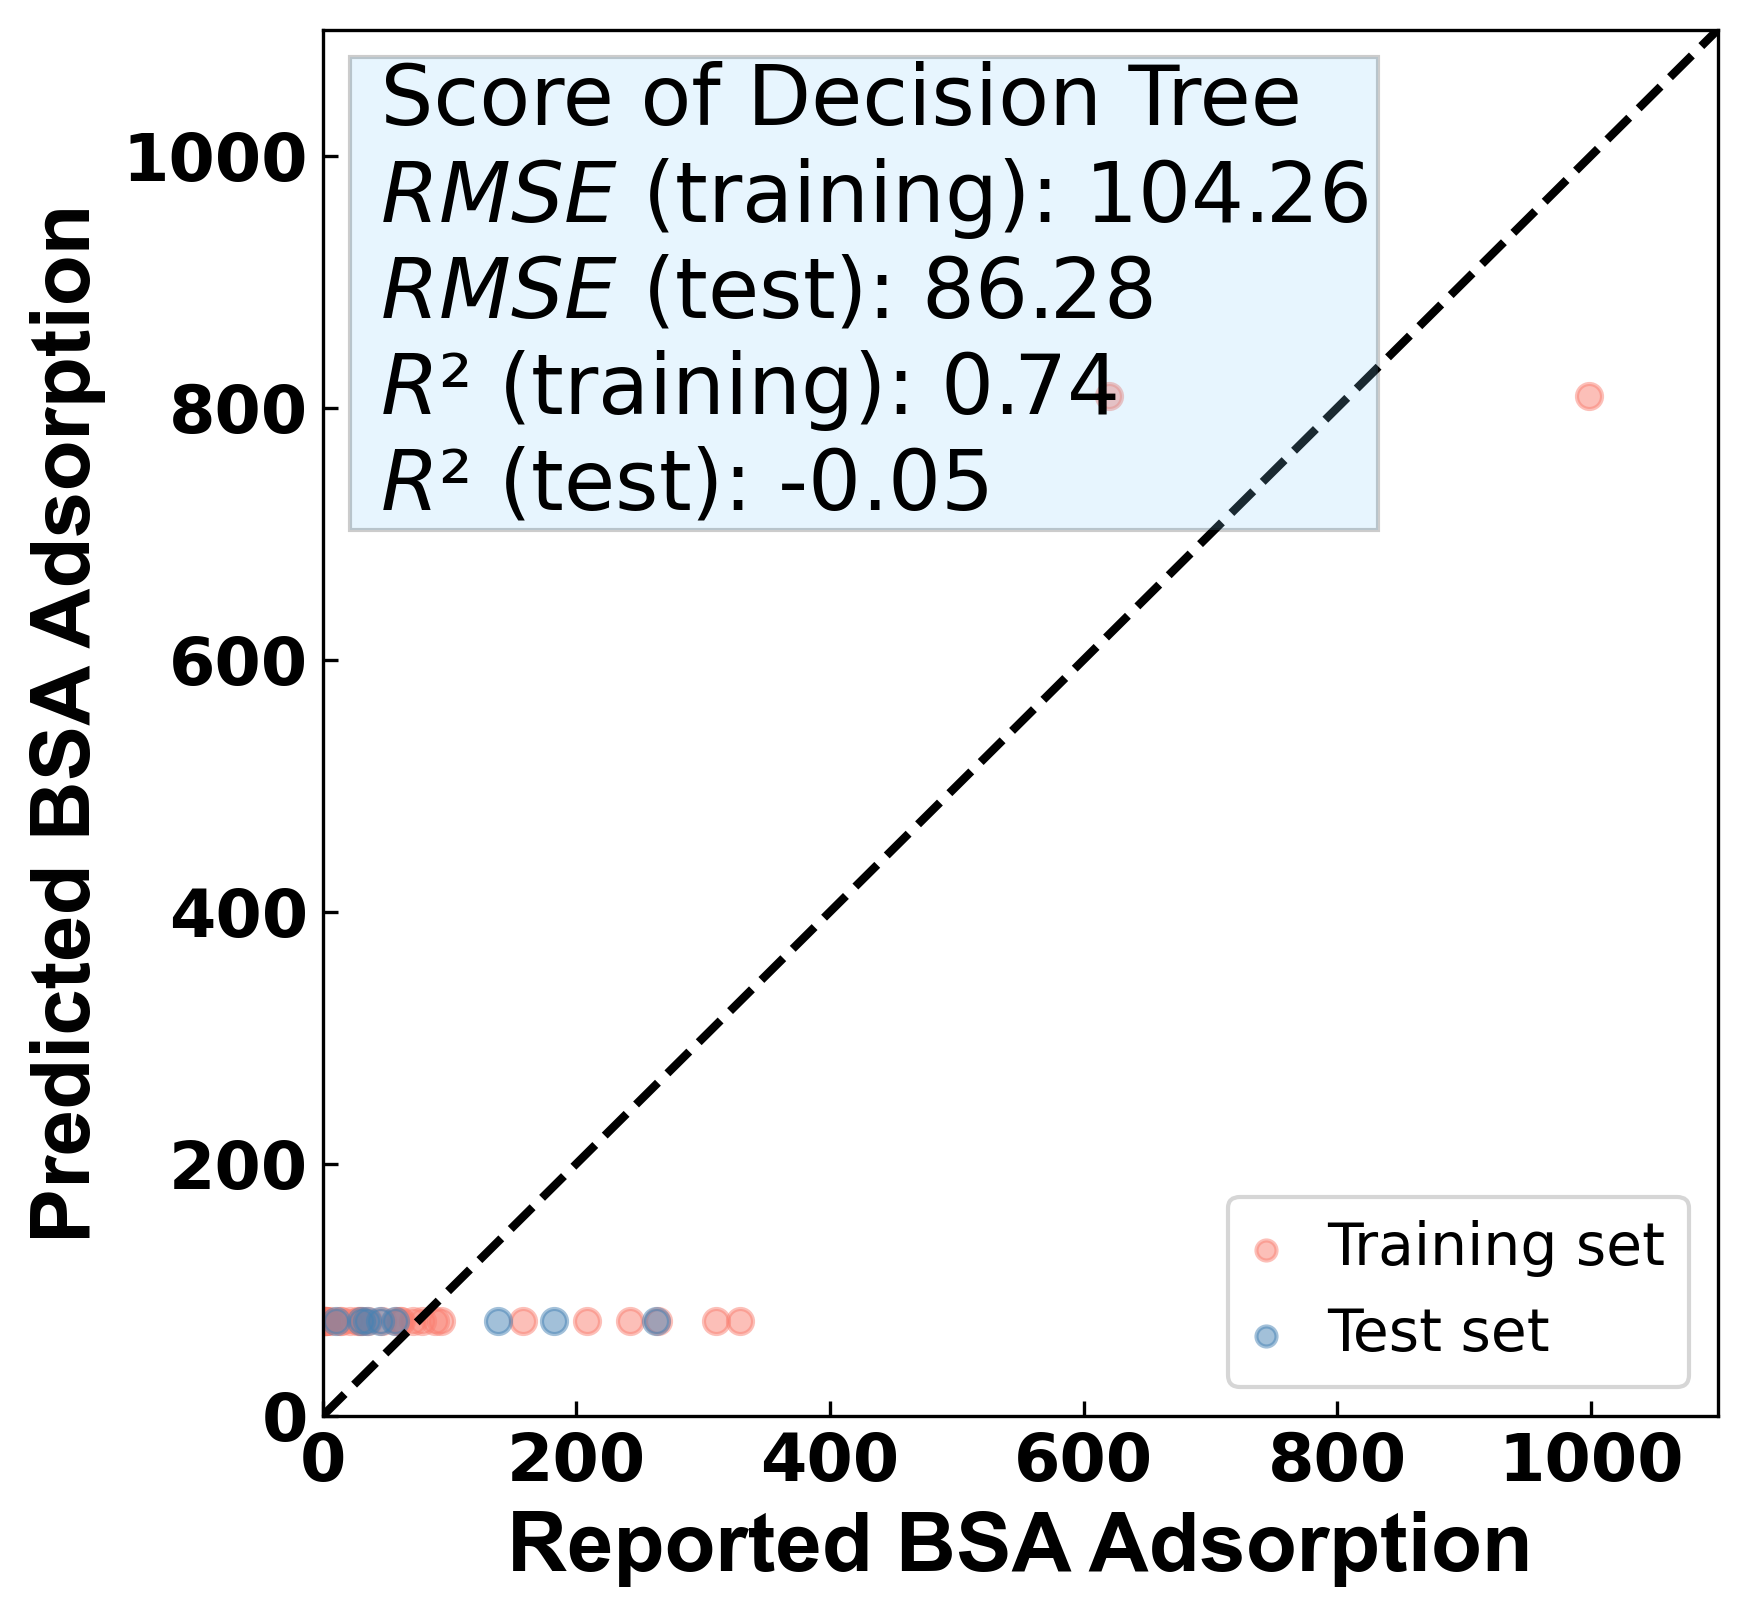

<Figure size 640x480 with 0 Axes>

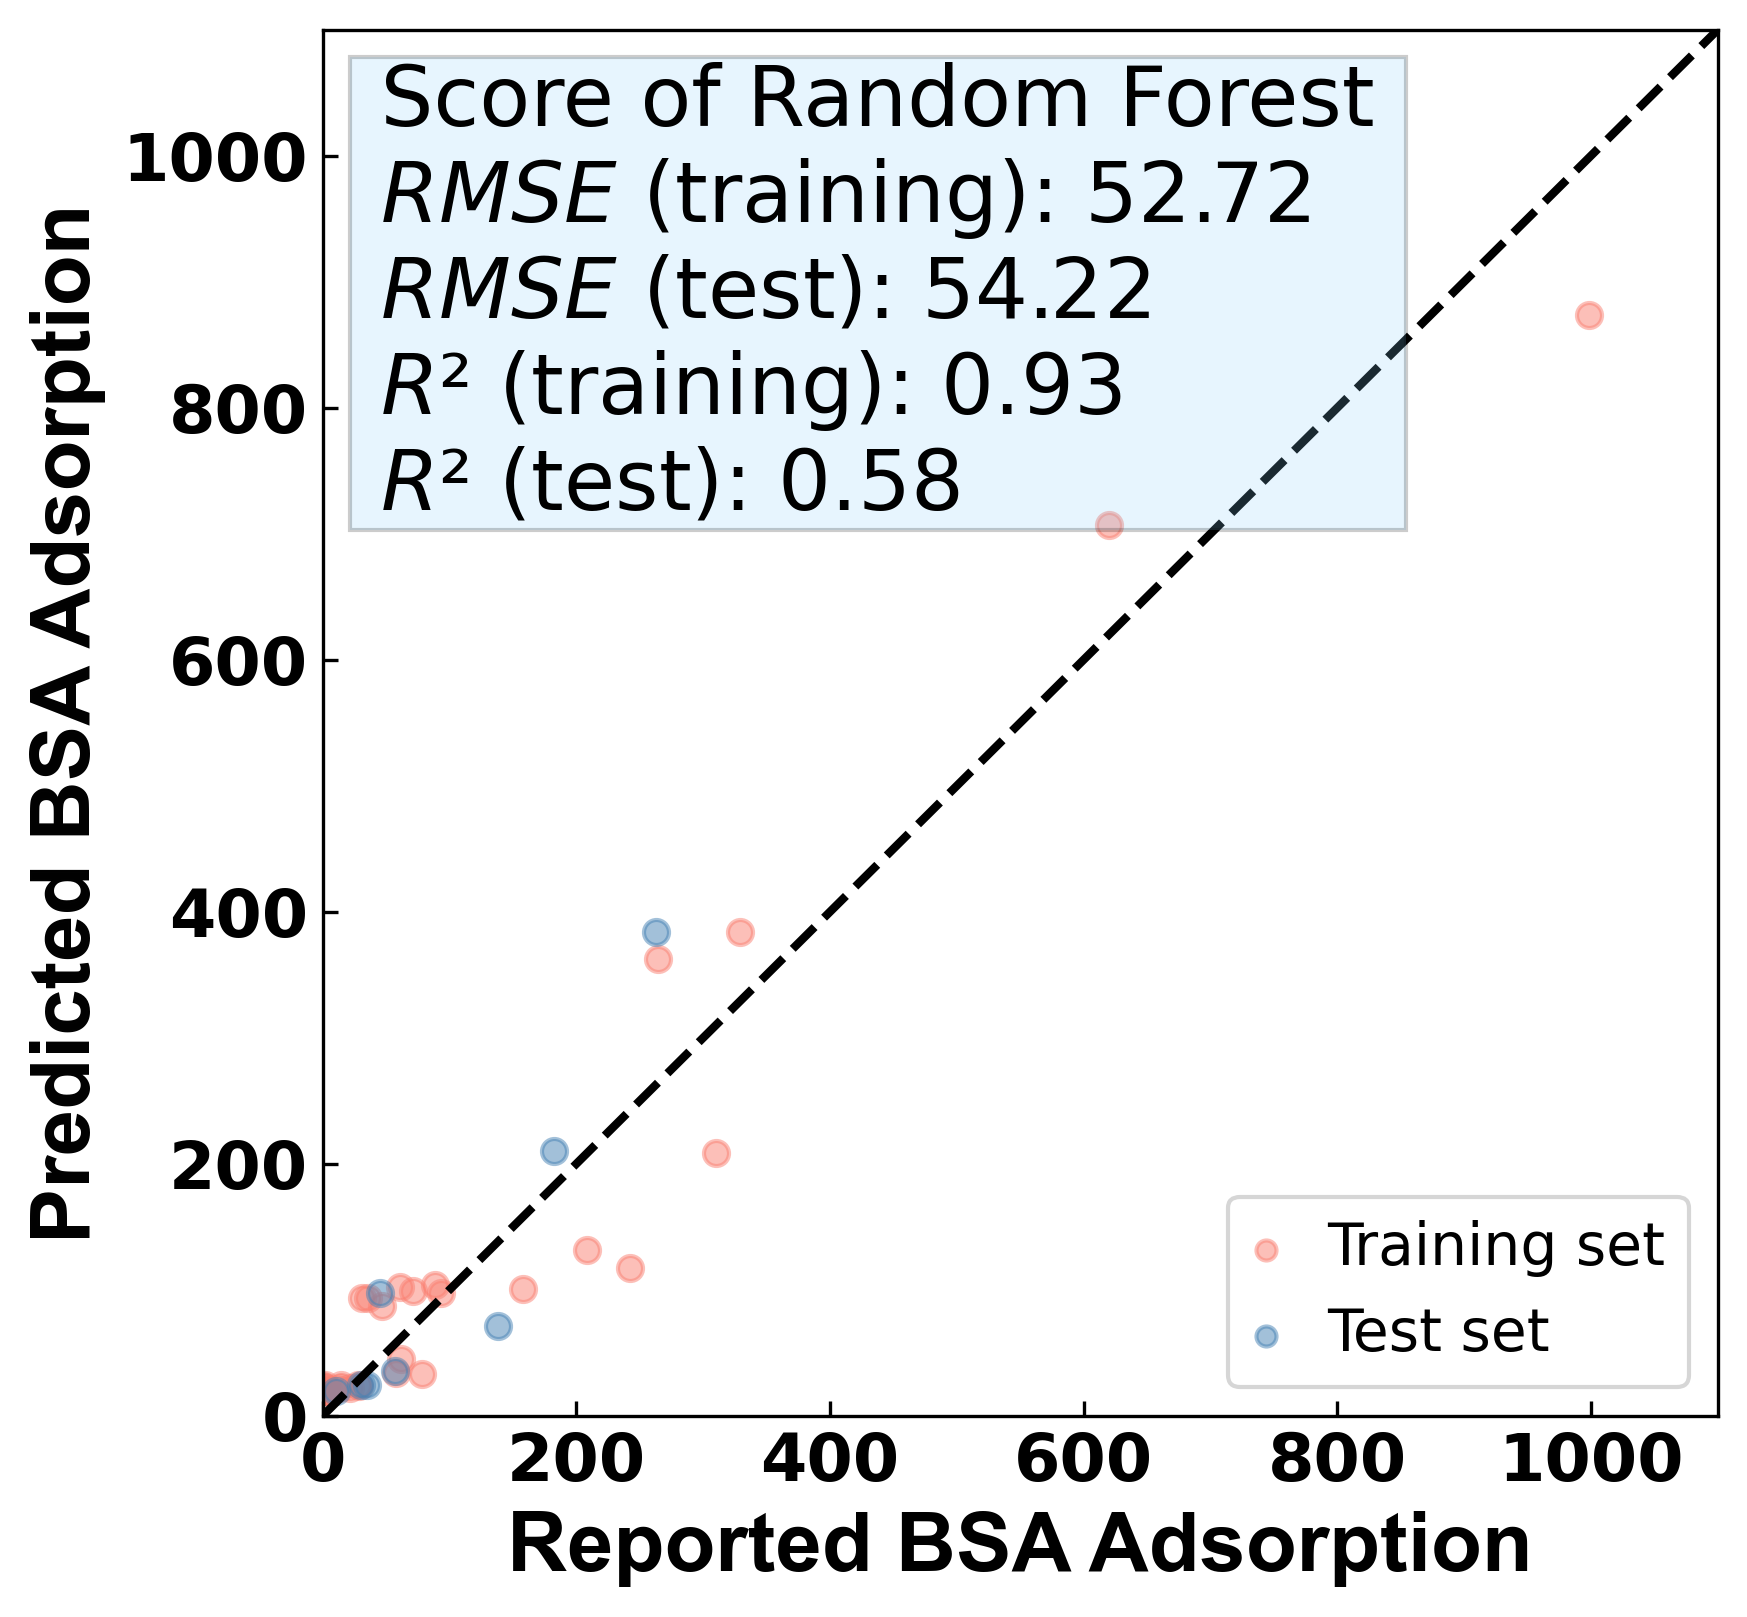

<Figure size 640x480 with 0 Axes>

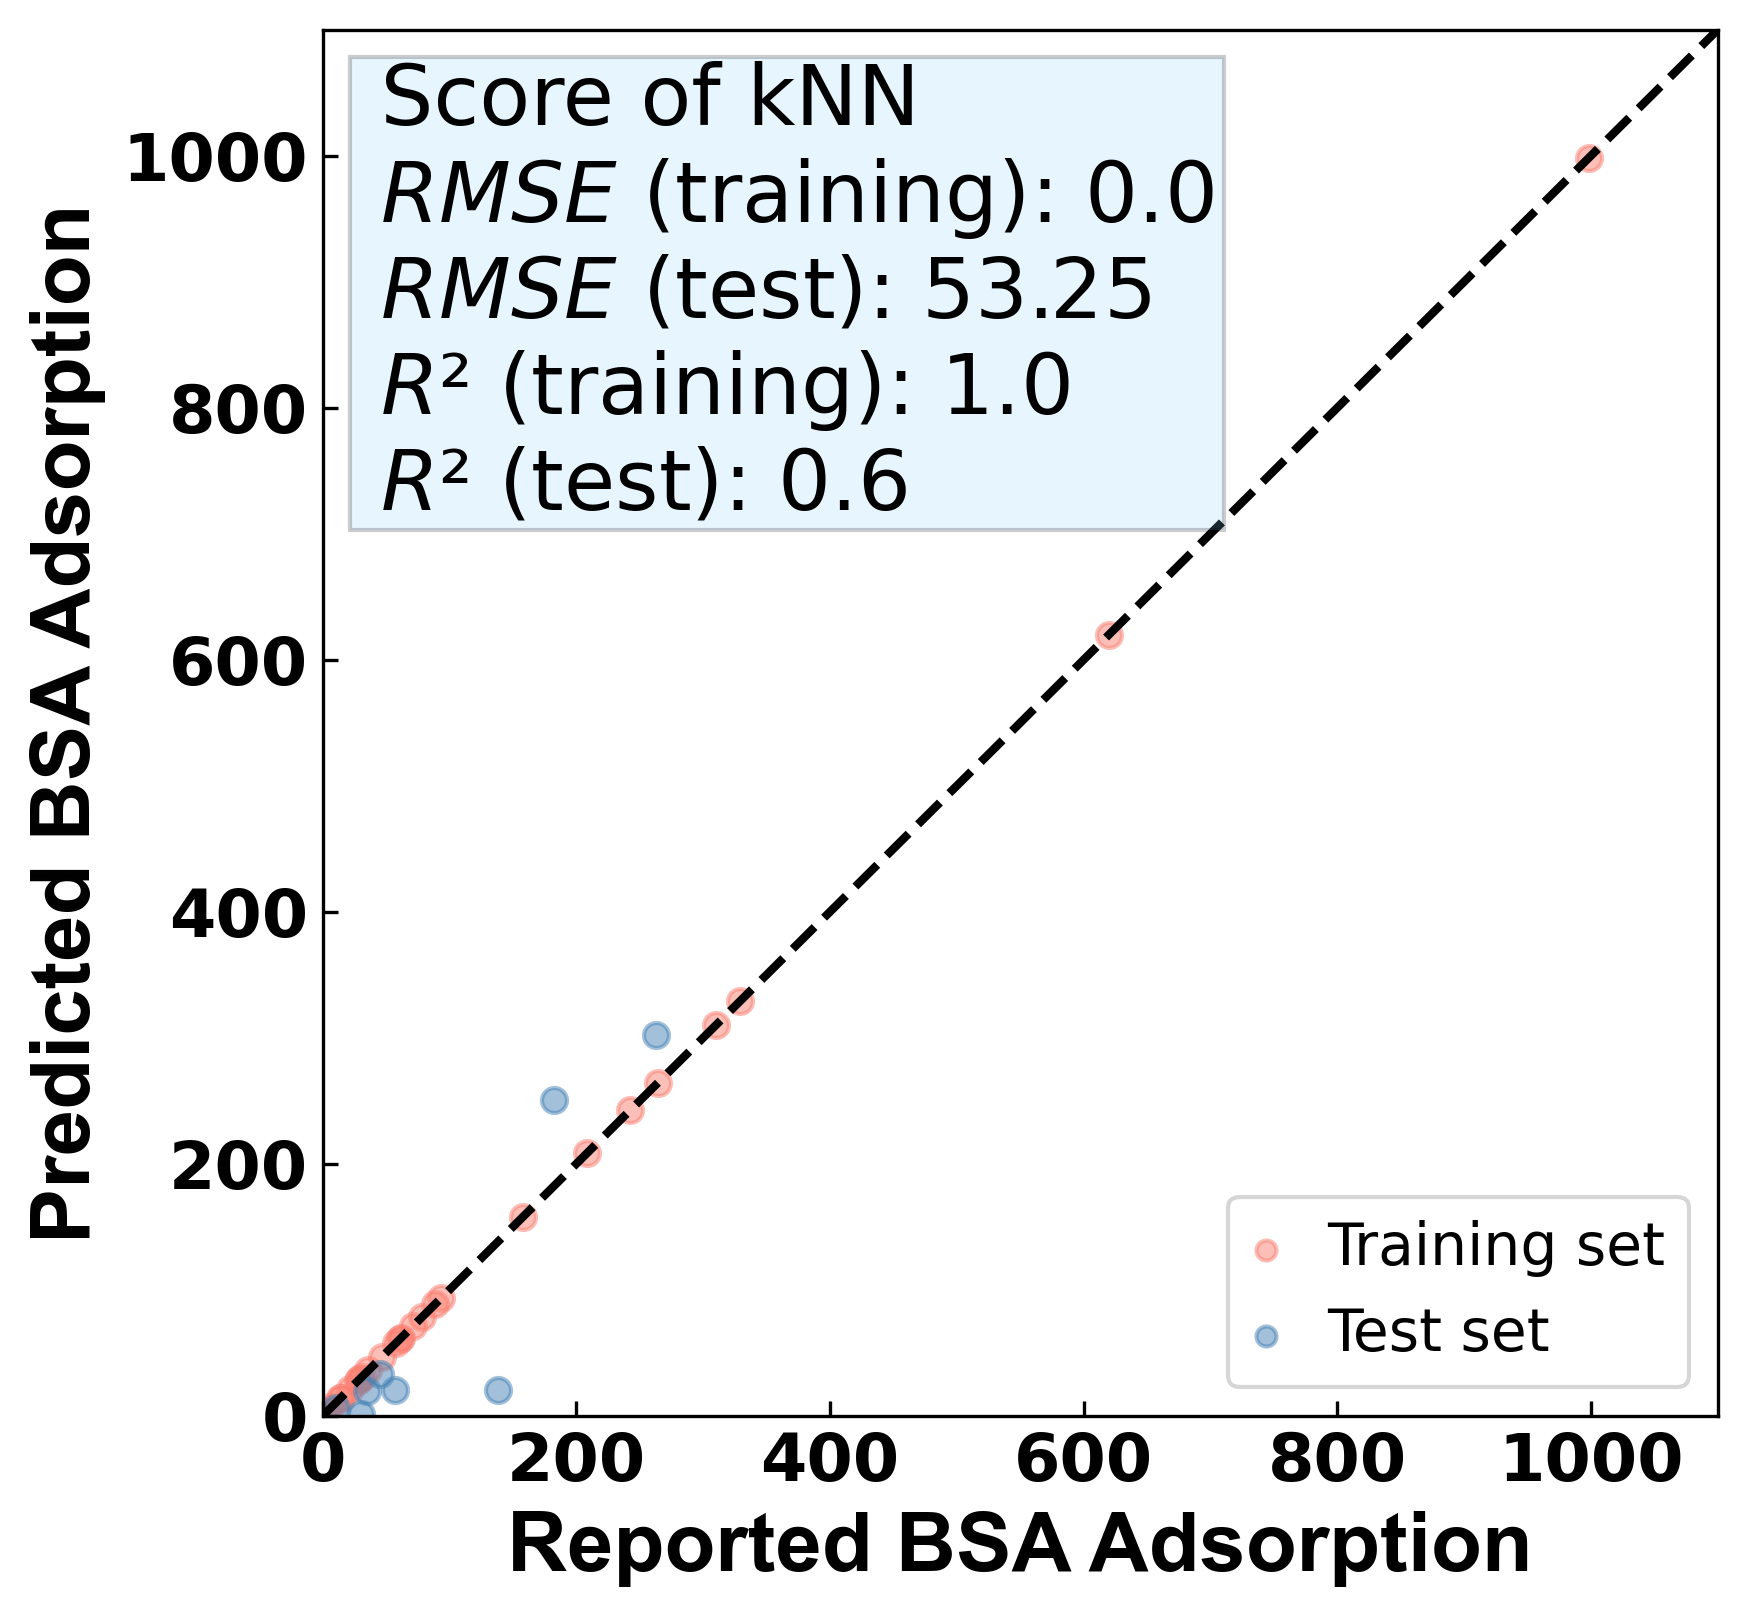

<Figure size 640x480 with 0 Axes>

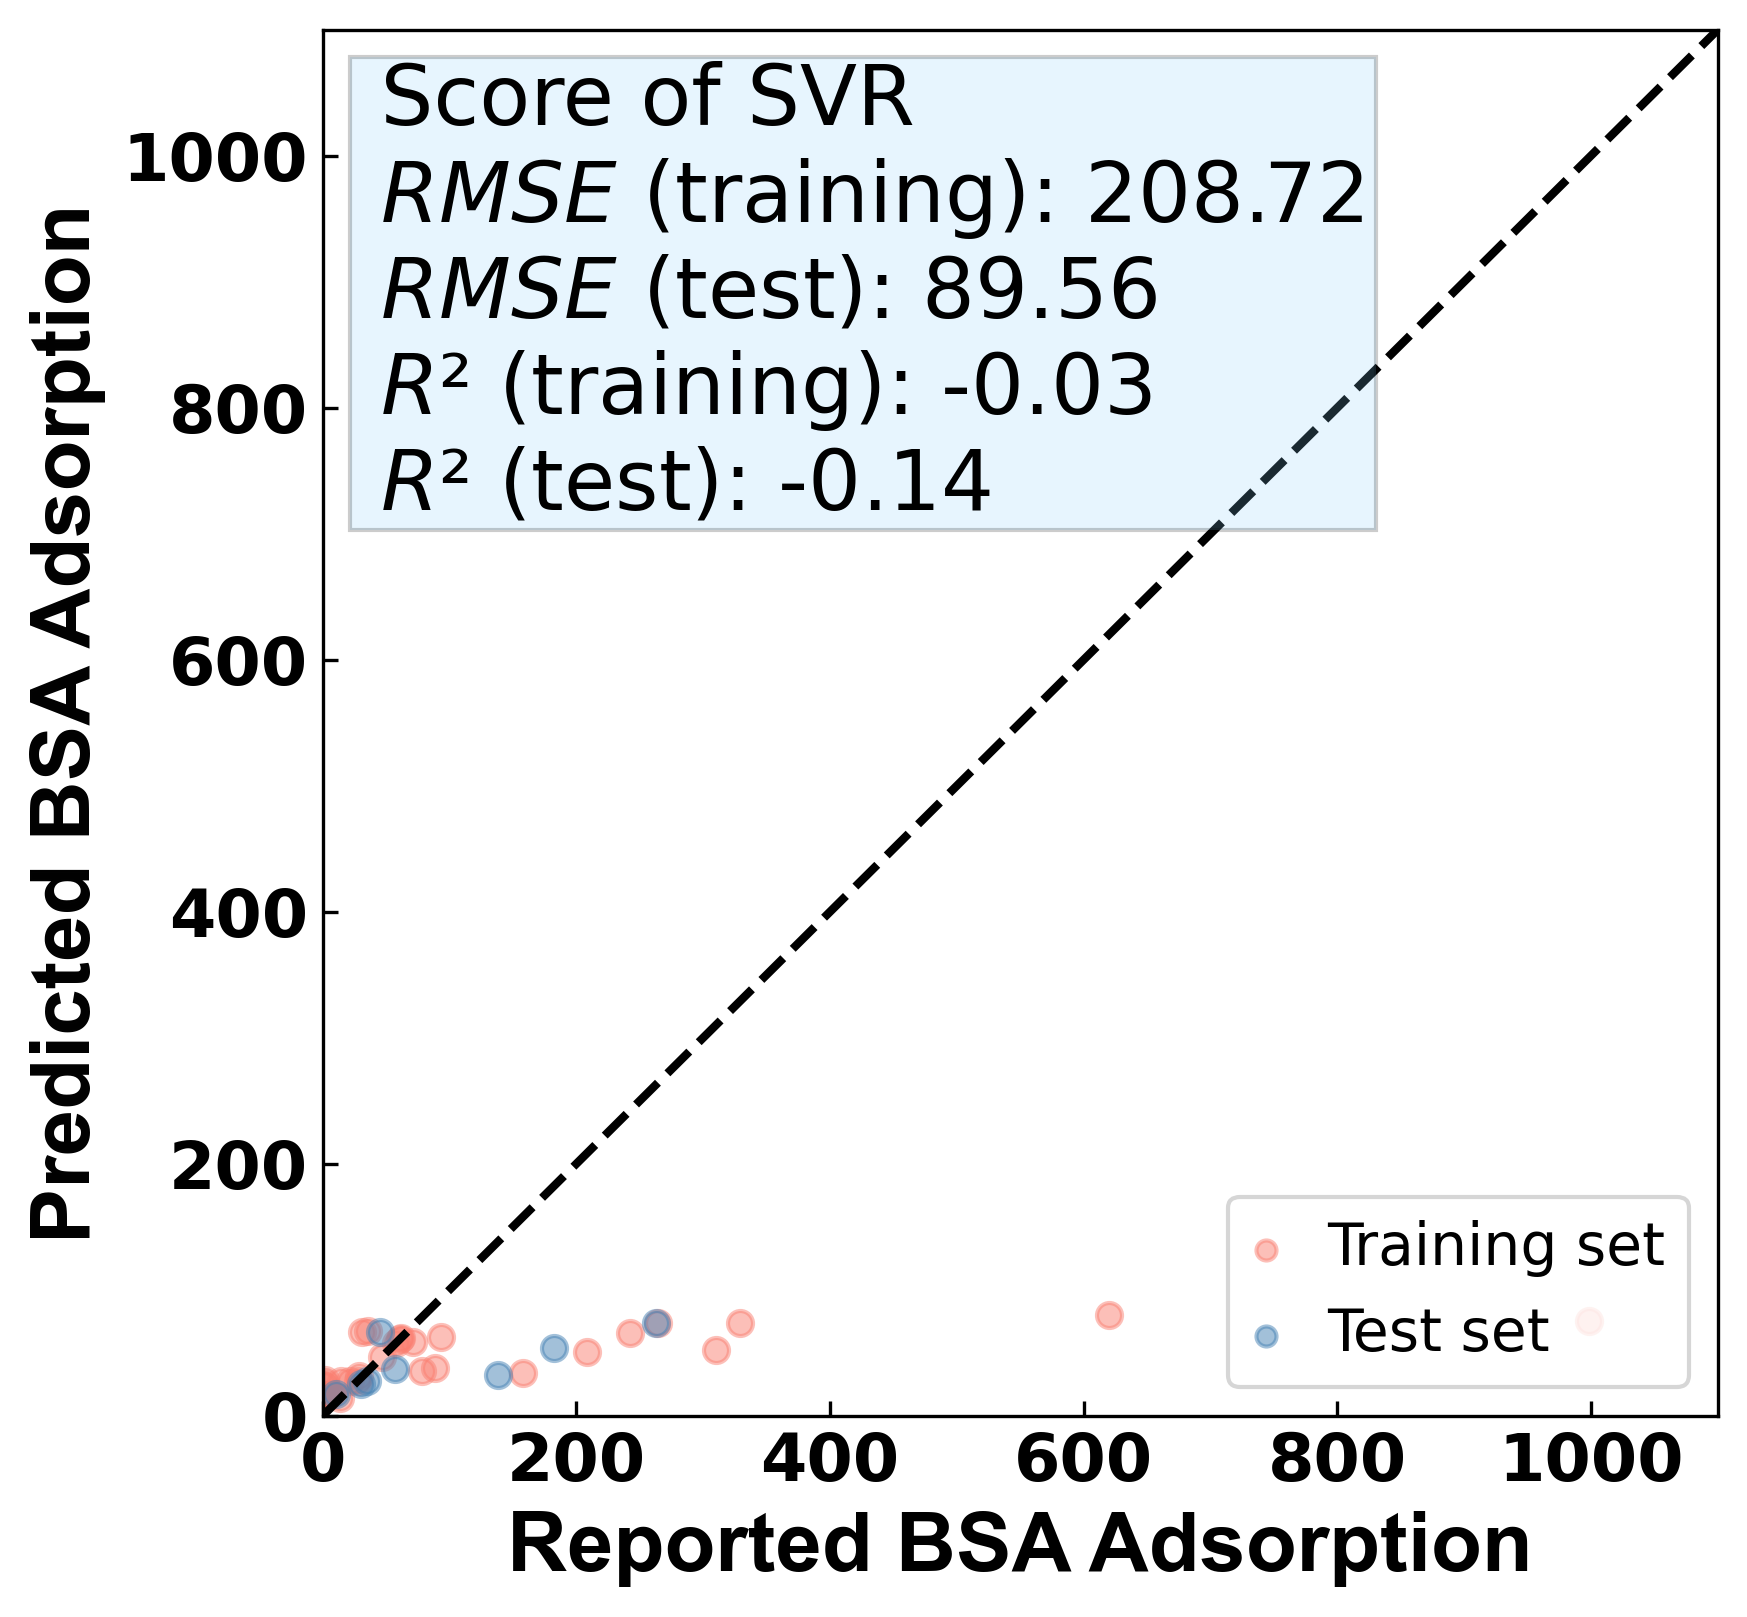

<Figure size 640x480 with 0 Axes>

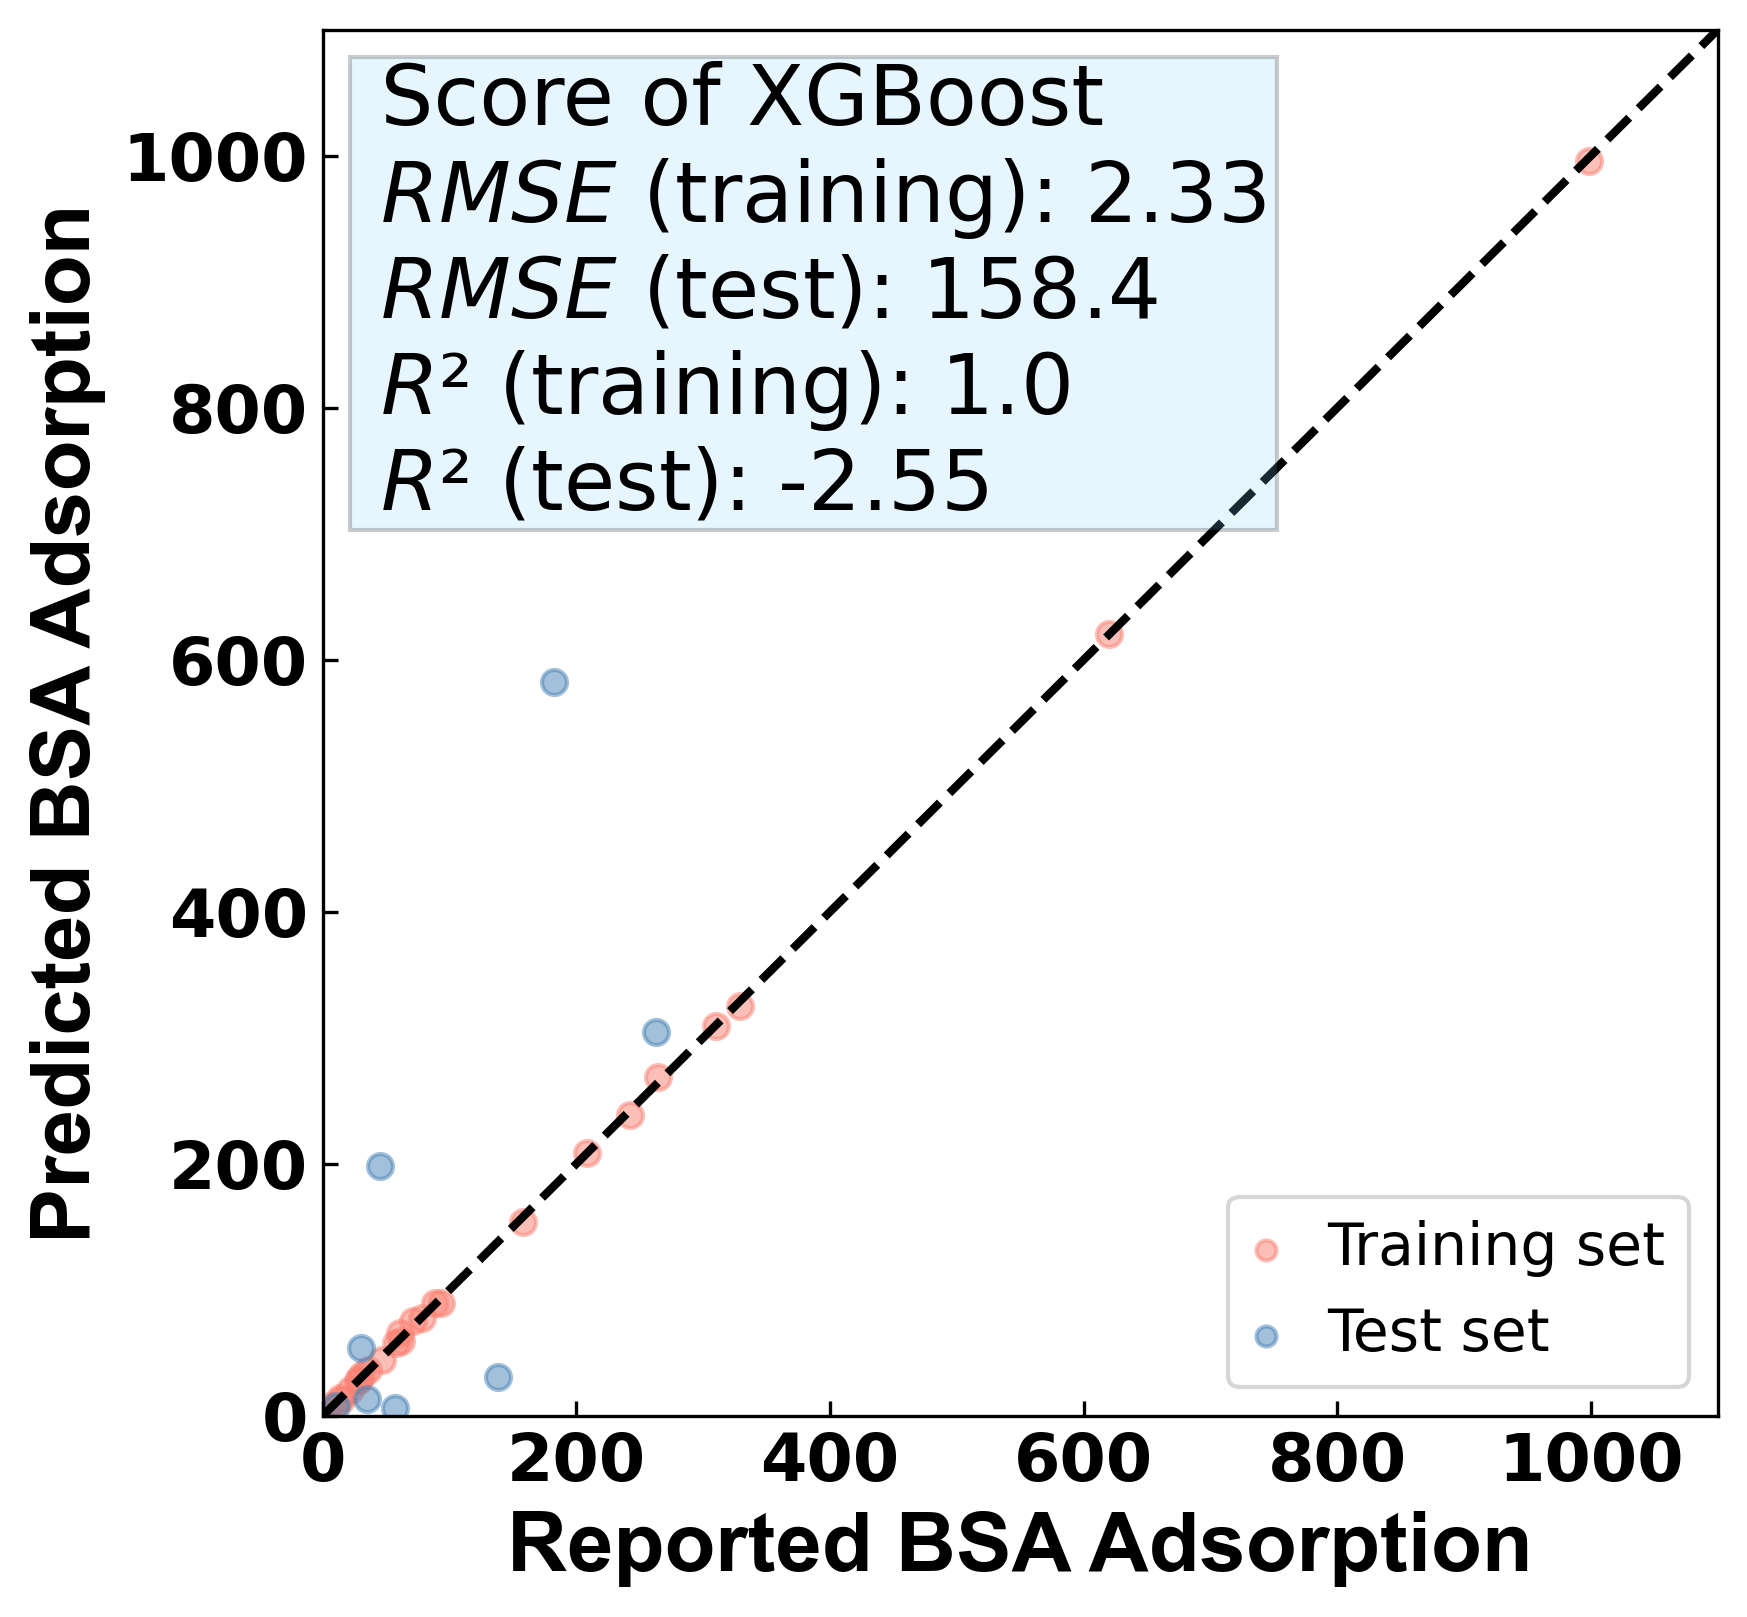

<Figure size 640x480 with 0 Axes>

In [37]:
models_name = ["LASSO", "Ridge", "Decision Tree", "Random Forest", "kNN", "SVR", "XGBoost"]

for i in range(len(trained_models_b)):
    result_show(trained_models_b[i], models_name[i], X_part_b, Y_part_array, X_val_b, Y_val_array)

model_output = "margin" has been renamed to model_output = "raw"
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


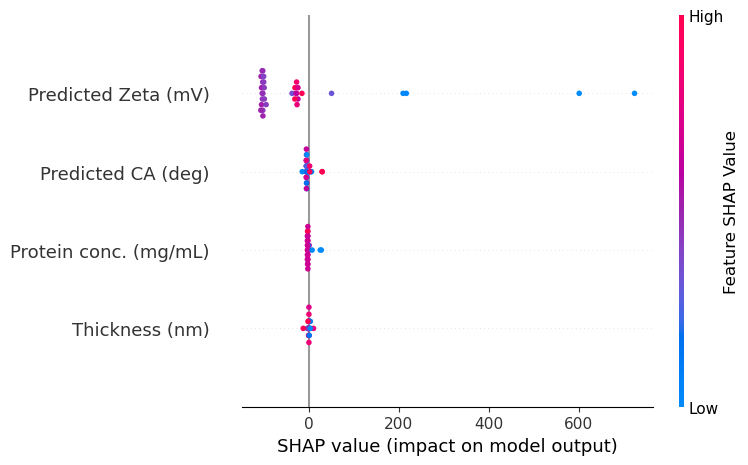

In [38]:
explainer = shap.TreeExplainer(model=trained_models_b[3],
                                feature_perturbation='tree_path_dependent',
                                model_output='margin')
shap_values = explainer.shap_values(X_part_b)
shap.summary_plot(shap_values, X_part_b, feature_names=df_b.columns.values, plot_size=(8,5), color_bar_label="Feature SHAP Value", auto_size_plot=None)

A+B

In [39]:

selected_c = ["Thickness (nm)",
              "MolLogP", "TPSA",
              "PEOE_VSA6", "PEOE_VSA7", "PEOE_VSA8", "PEOE_VSA9", "PEOE_VSA10", 
              "Predicted Zeta (mV)", "Predicted CA (deg)",
              "Protein conc. (mg/mL)"]
df_c = df[selected_c]

df_c.head()

Thickness (nm)  MolLogP   TPSA  PEOE_VSA6  PEOE_VSA7  PEOE_VSA8  \
53          13.800   0.6673  29.54   6.578936  21.019081  12.117861   
54          16.600  -1.7104  32.20   6.578936  20.771212   5.573105   
55          19.500  -0.9334  32.20   6.578936  34.618686   5.573105   
56          11.962   1.9058  26.30  19.923495  13.344559   5.573105   
57          16.822   0.0980  46.53   6.578936   6.923737   5.573105   

    PEOE_VSA9  PEOE_VSA10  Predicted Zeta (mV)  Predicted CA (deg)  \
53   0.000000    6.606882            16.319553           16.000903   
54   0.000000   19.696395             8.157993           39.725957   
55   0.000000   18.690564             7.166369           65.901976   
56   6.606882    0.000000           -18.940662           81.844615   
57   6.606882    6.606882           -12.367573           47.561973   

    Protein conc. (mg/mL)  
53                    1.0  
54                    1.0  
55                    1.0  
56                    1.0  
57                    1.0

In [40]:
scaler = MaxAbsScaler()
X_c = scaler.fit_transform(df_c)
X_c = np.array(X_c)

Y = np.array(df_label)

X_part_c, X_val_c, Y_part_array, Y_val_array = train_test_split(X_c, Y, test_size=0.2, random_state=42)

In [41]:
param_lasso = {"alpha": np.arange(0.05, 3., 0.01),
              "fit_intercept": [True, False]}

param_ridge = {"alpha": np.arange(0.05, 3., 0.01),
              "fit_intercept": [True, False]}

param_tree = {"max_depth": np.arange(1, 10),
             "min_samples_leaf": np.arange(1, 10, 1),
             "random_state": [42]}

param_forest = {"max_depth": np.arange(1, 10),
             "min_samples_leaf": np.arange(1, 5, 1),
             "n_estimators": [50, 75, 100, 125, 150, 250, 500],
             "random_state": [42]}

param_knn = {"n_neighbors": np.arange(1, 15),
              "weights": ["uniform", "distance"]}

param_svr = {"C": [0.1, 1, 10, 100, 1000],
              "epsilon": [0.01, 0.1, 1, 10],
              "kernel": ["linear", "poly", "rbf", "sigmoid"]}

param_xgb = {"max_depth": np.arange(1, 20),
             "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
             "n_estimators": [50, 75, 100, 125, 150, 250, 500],
             "random_state": [42]}

models_param = {
    "Lasso": {"model": Lasso(), "param": param_lasso},
    "Ridge": {"model": Ridge(), "param": param_ridge},
    "Decision Tree": {"model": DecisionTreeRegressor(), "param": param_tree},
    "Random Forest": {"model": RandomForestRegressor(), "param": param_forest},
    "kNN": {"model": KNeighborsRegressor(), "param": param_knn},
    "SVR": {"model": SVR(), "param": param_svr},
    "XGBoost": {"model": XGBRegressor(), "param": param_xgb}
}

optimized_models = {"Lasso":{"scores":[]},
                    "Ridge":{"scores":[]},
                    "Decision Tree":{"scores":[]},
                    "Random Forest":{"scores":[]},
                    "kNN":{"scores":[]},
                    "SVR":{"scores":[]},
                    "XGBoost":{"scores":[]}}

outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
loo = LeaveOneOut()

In [42]:
trained_models_c = []

for model_name, model_param in models_param.items():
    print("Training "+model_name+"...")
    model = model_param["model"]
    param = model_param["param"]
    
    grid = GridSearchCV(model, param, cv=outer_cv, n_jobs=-1)
    grid.fit(X_part_c, Y_part_array)
    #grid_models_peoe.append(grid)
    print("Best parameters for "+model_name, grid.best_params_)
    model_ = grid.best_estimator_
    # dump(model_peoe, model_name+"_peoe.joblib")
    trained_models_c.append(model_)

    print("-------------------------NEXT-------------------------")

Training Lasso...
Best parameters for Lasso {'alpha': 0.05, 'fit_intercept': True}
-------------------------NEXT-------------------------
Training Ridge...
Best parameters for Ridge {'alpha': 2.99, 'fit_intercept': True}
-------------------------NEXT-------------------------
Training Decision Tree...
Best parameters for Decision Tree {'max_depth': 1, 'min_samples_leaf': 8, 'random_state': 42}
-------------------------NEXT-------------------------
Training Random Forest...
Best parameters for Random Forest {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 50, 'random_state': 42}
-------------------------NEXT-------------------------
Training kNN...
Best parameters for kNN {'n_neighbors': 2, 'weights': 'distance'}
-------------------------NEXT-------------------------
Training SVR...
Best parameters for SVR {'C': 1000, 'epsilon': 0.01, 'kernel': 'rbf'}
-------------------------NEXT-------------------------
Training XGBoost...
Best parameters for XGBoost {'learning_rate': 0.2, 'max_

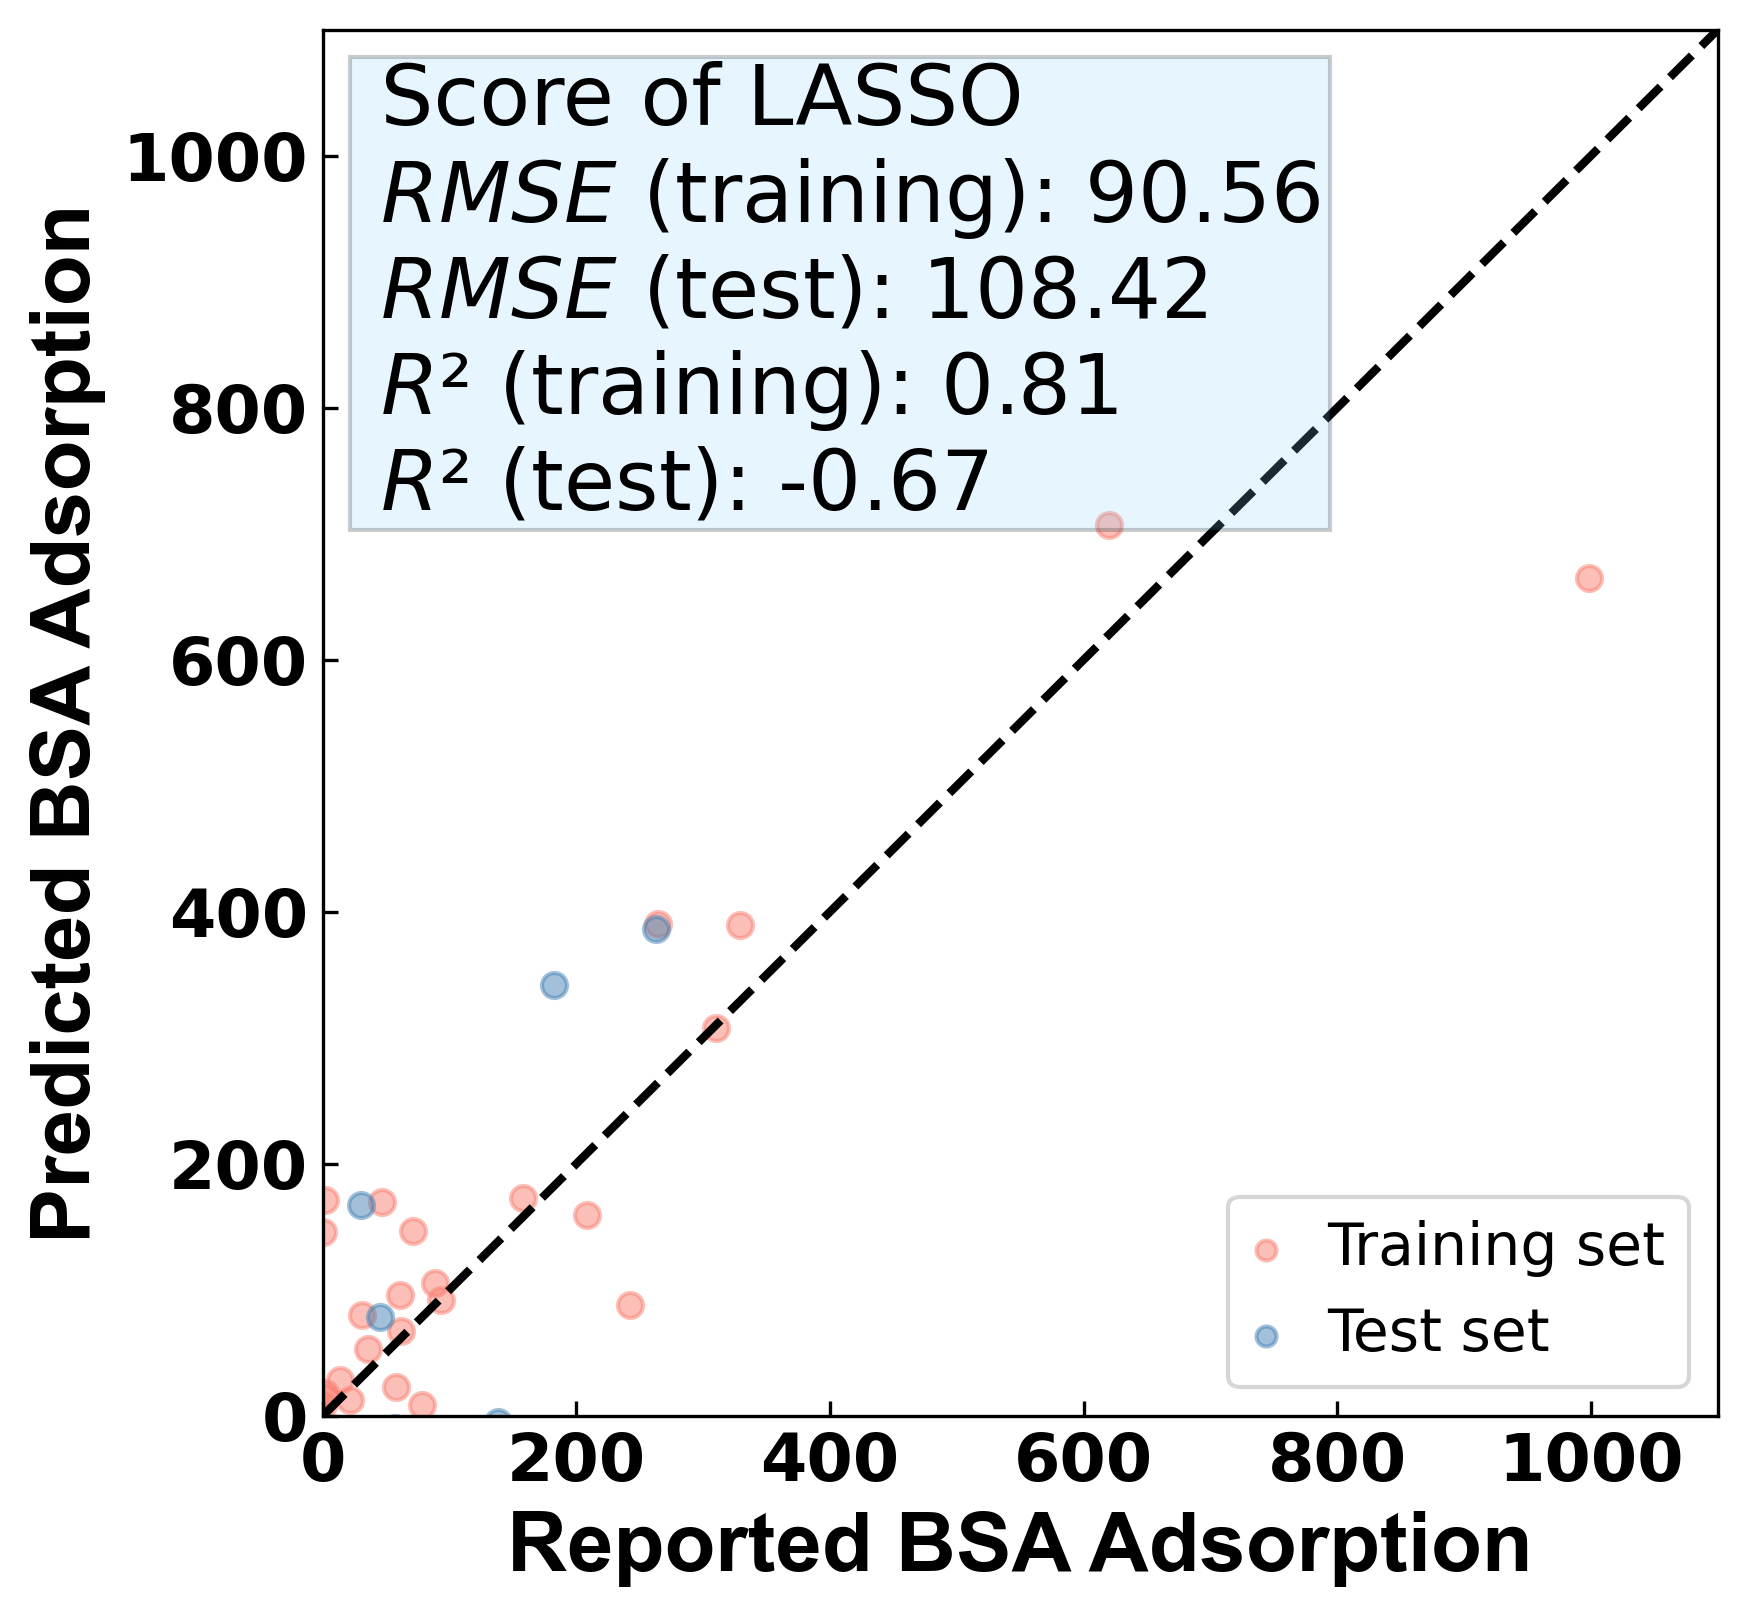

<Figure size 640x480 with 0 Axes>

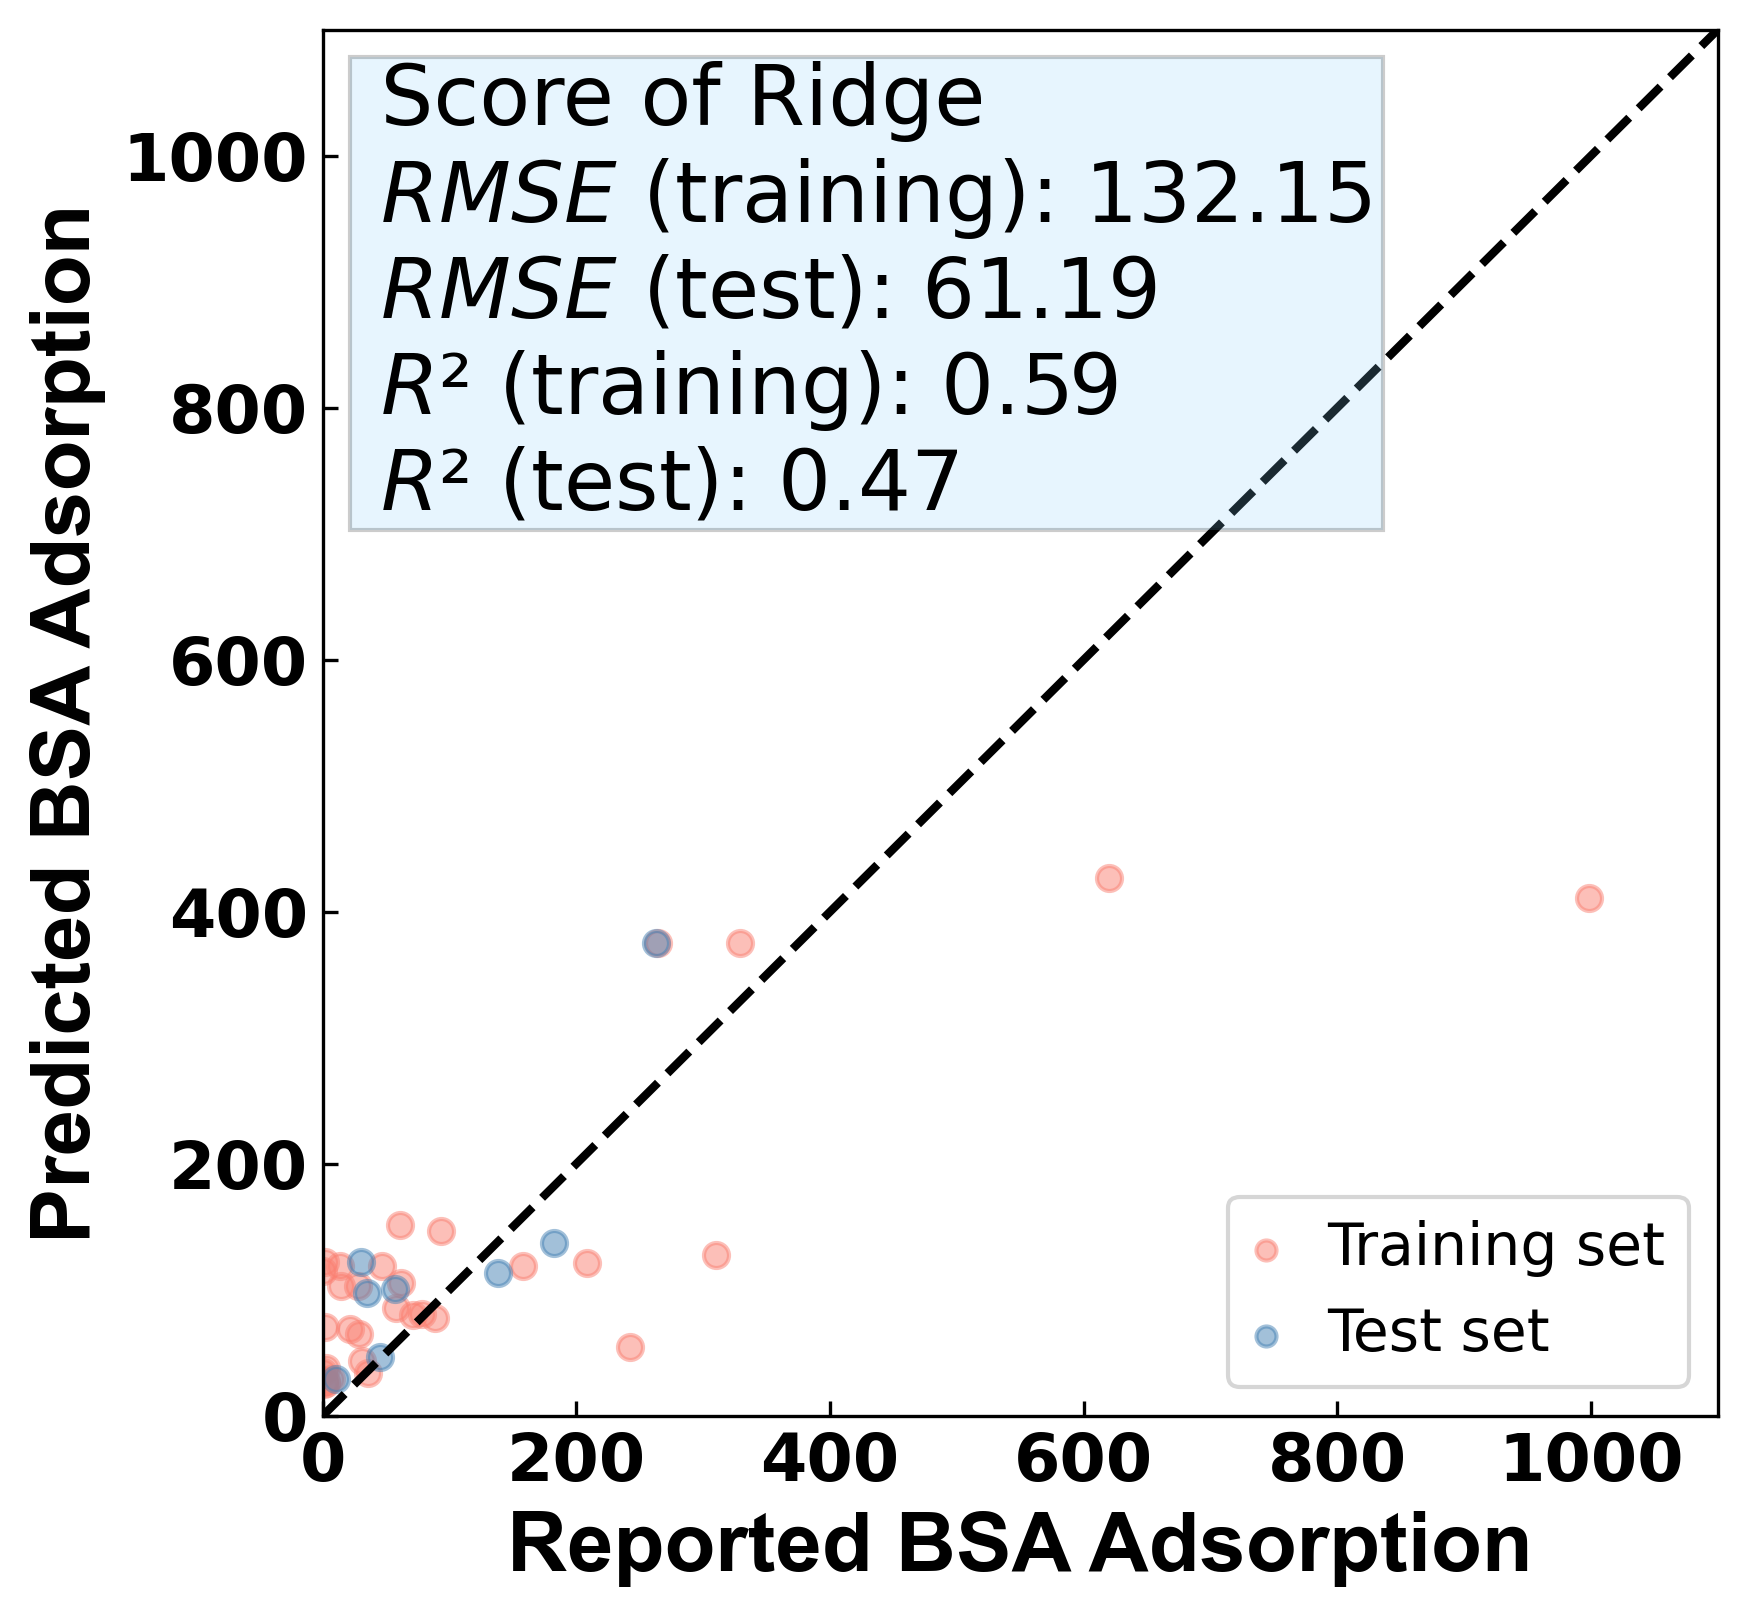

<Figure size 640x480 with 0 Axes>

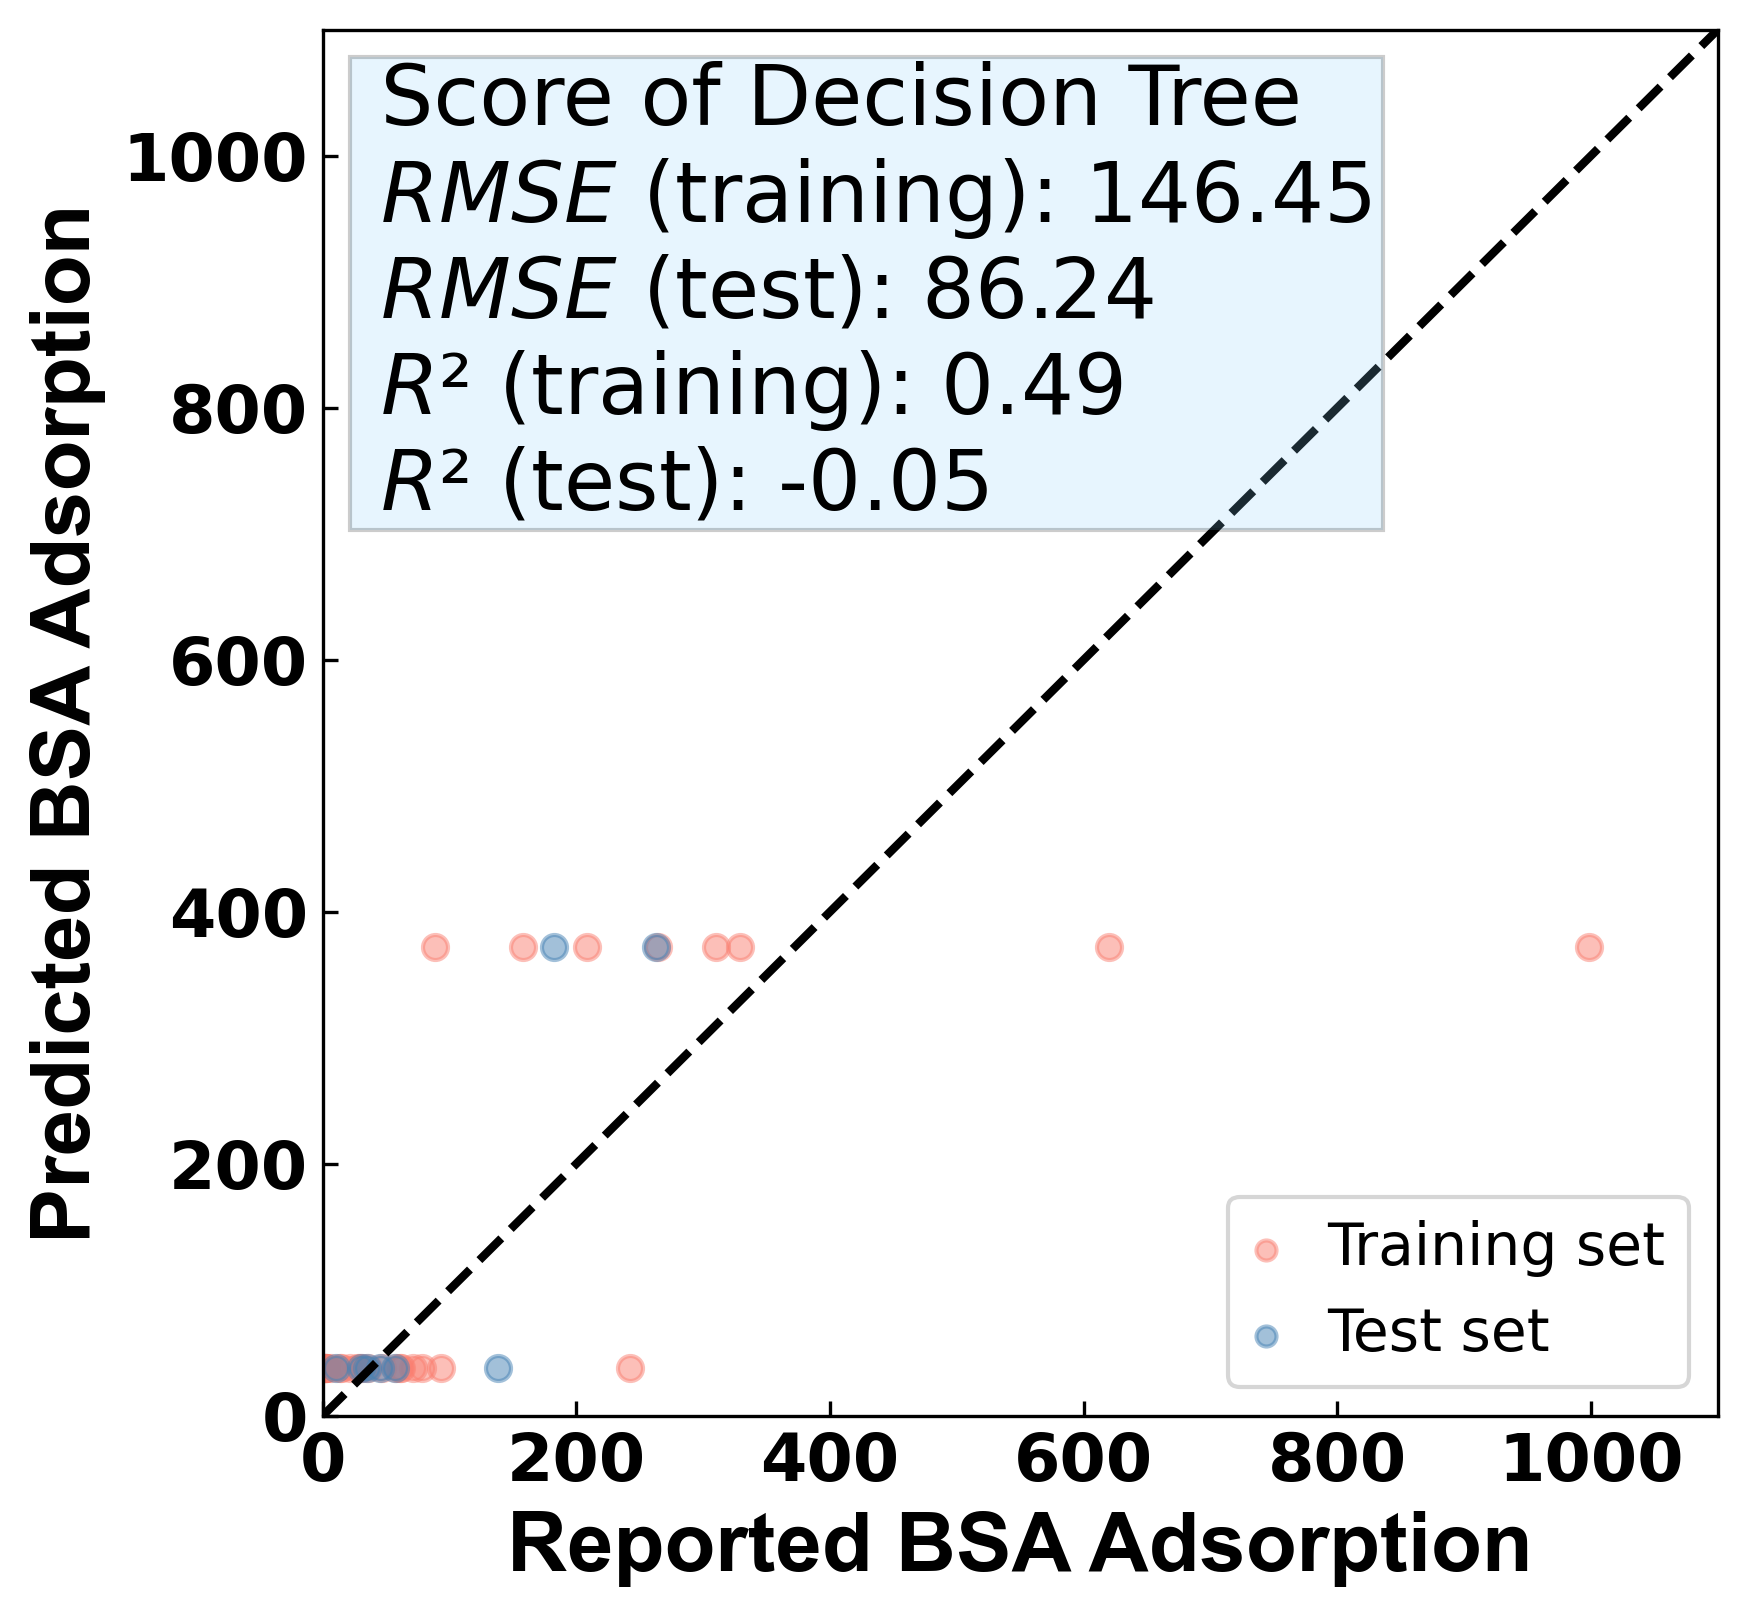

<Figure size 640x480 with 0 Axes>

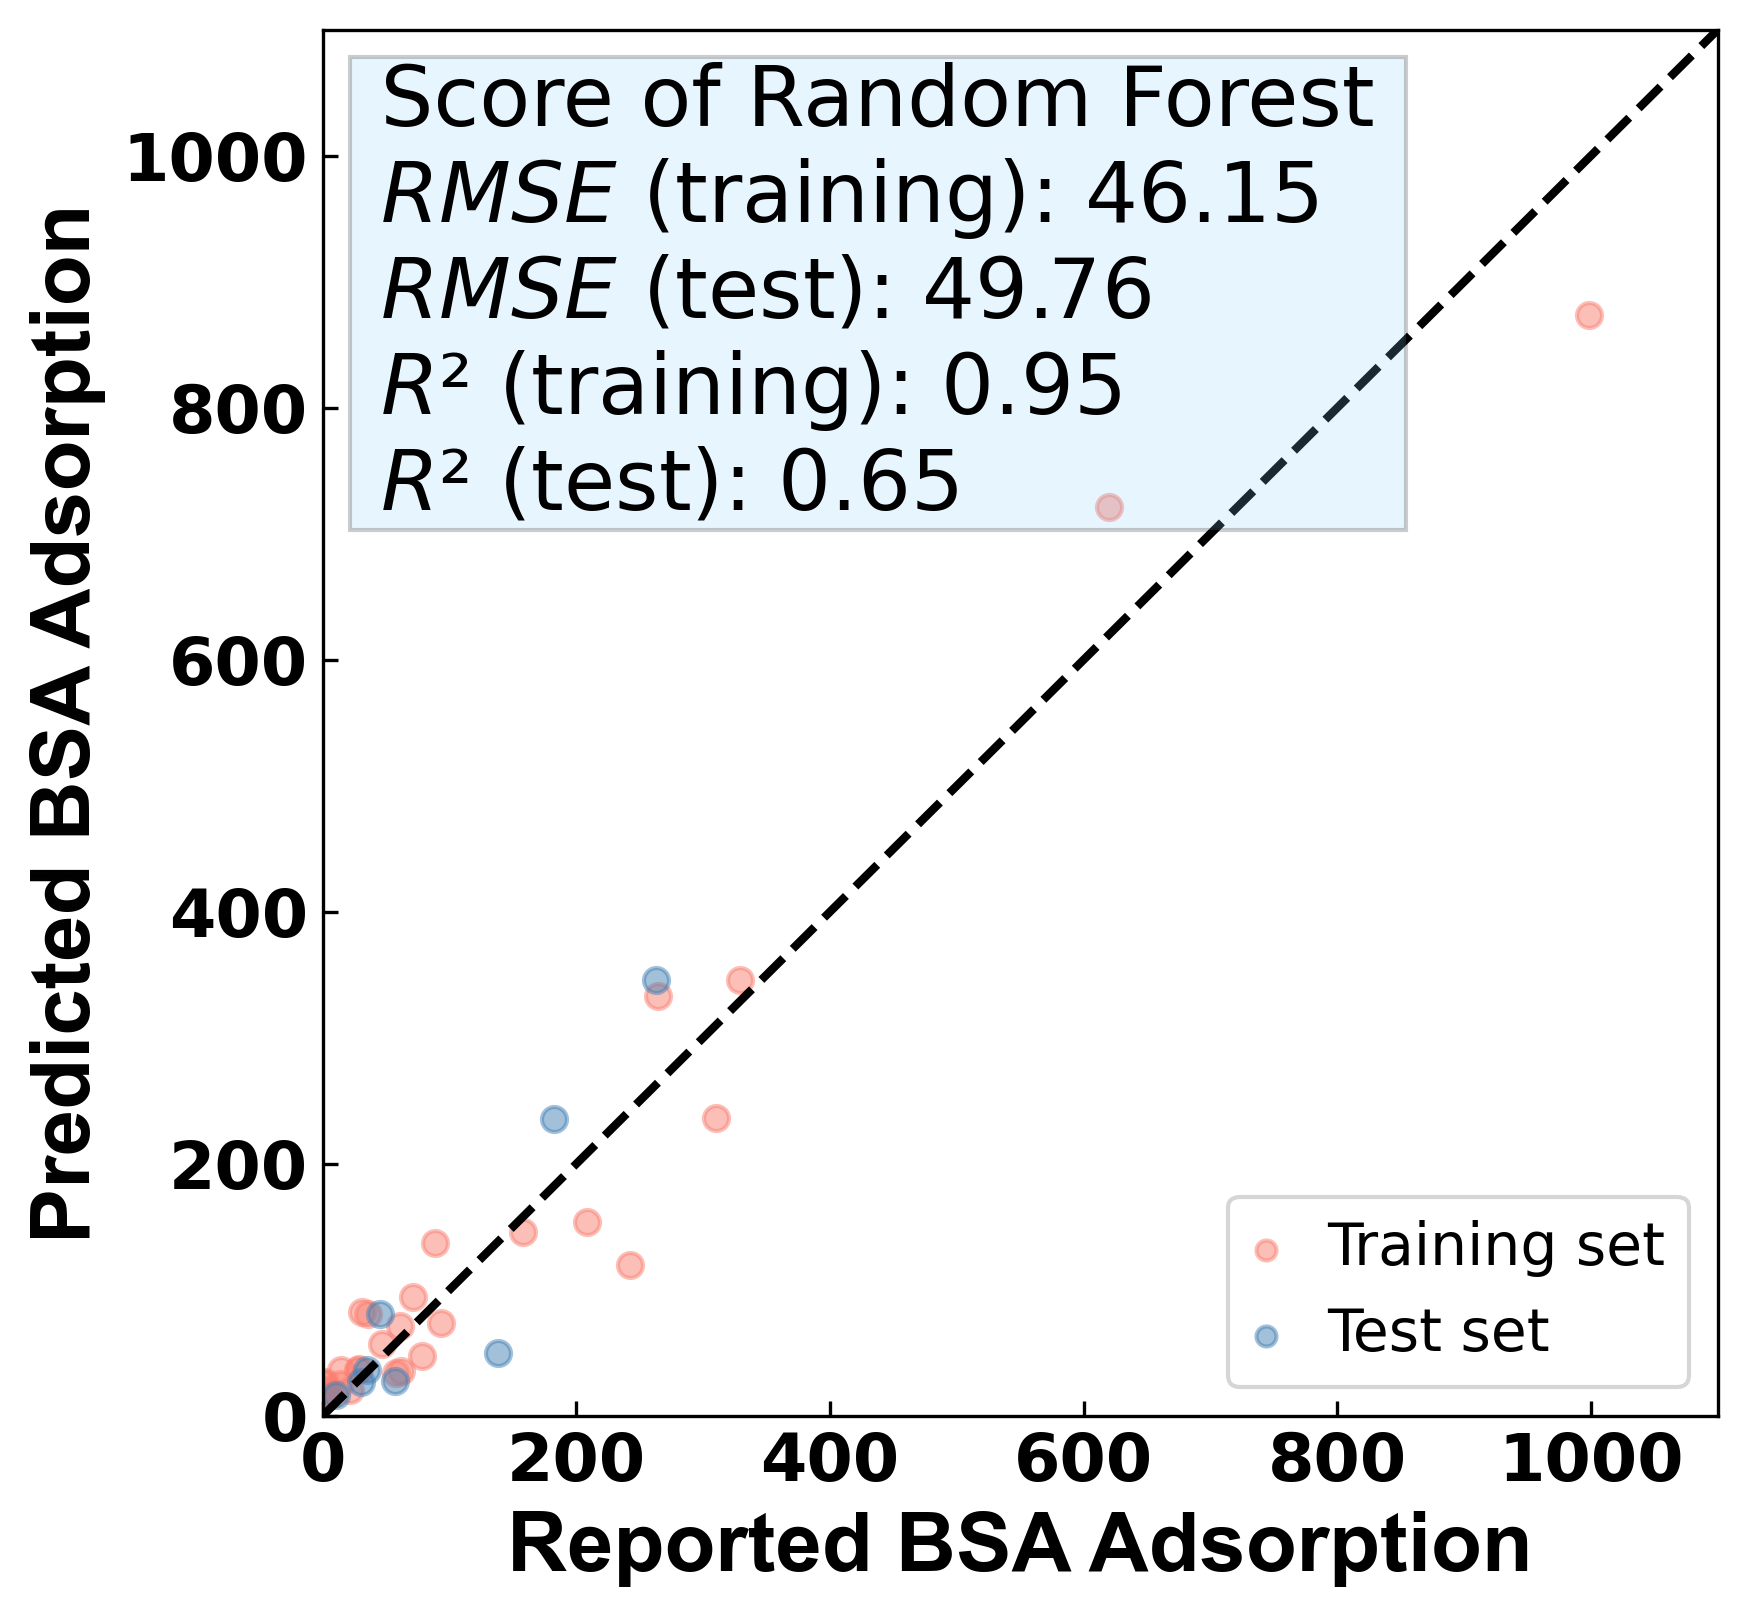

<Figure size 640x480 with 0 Axes>

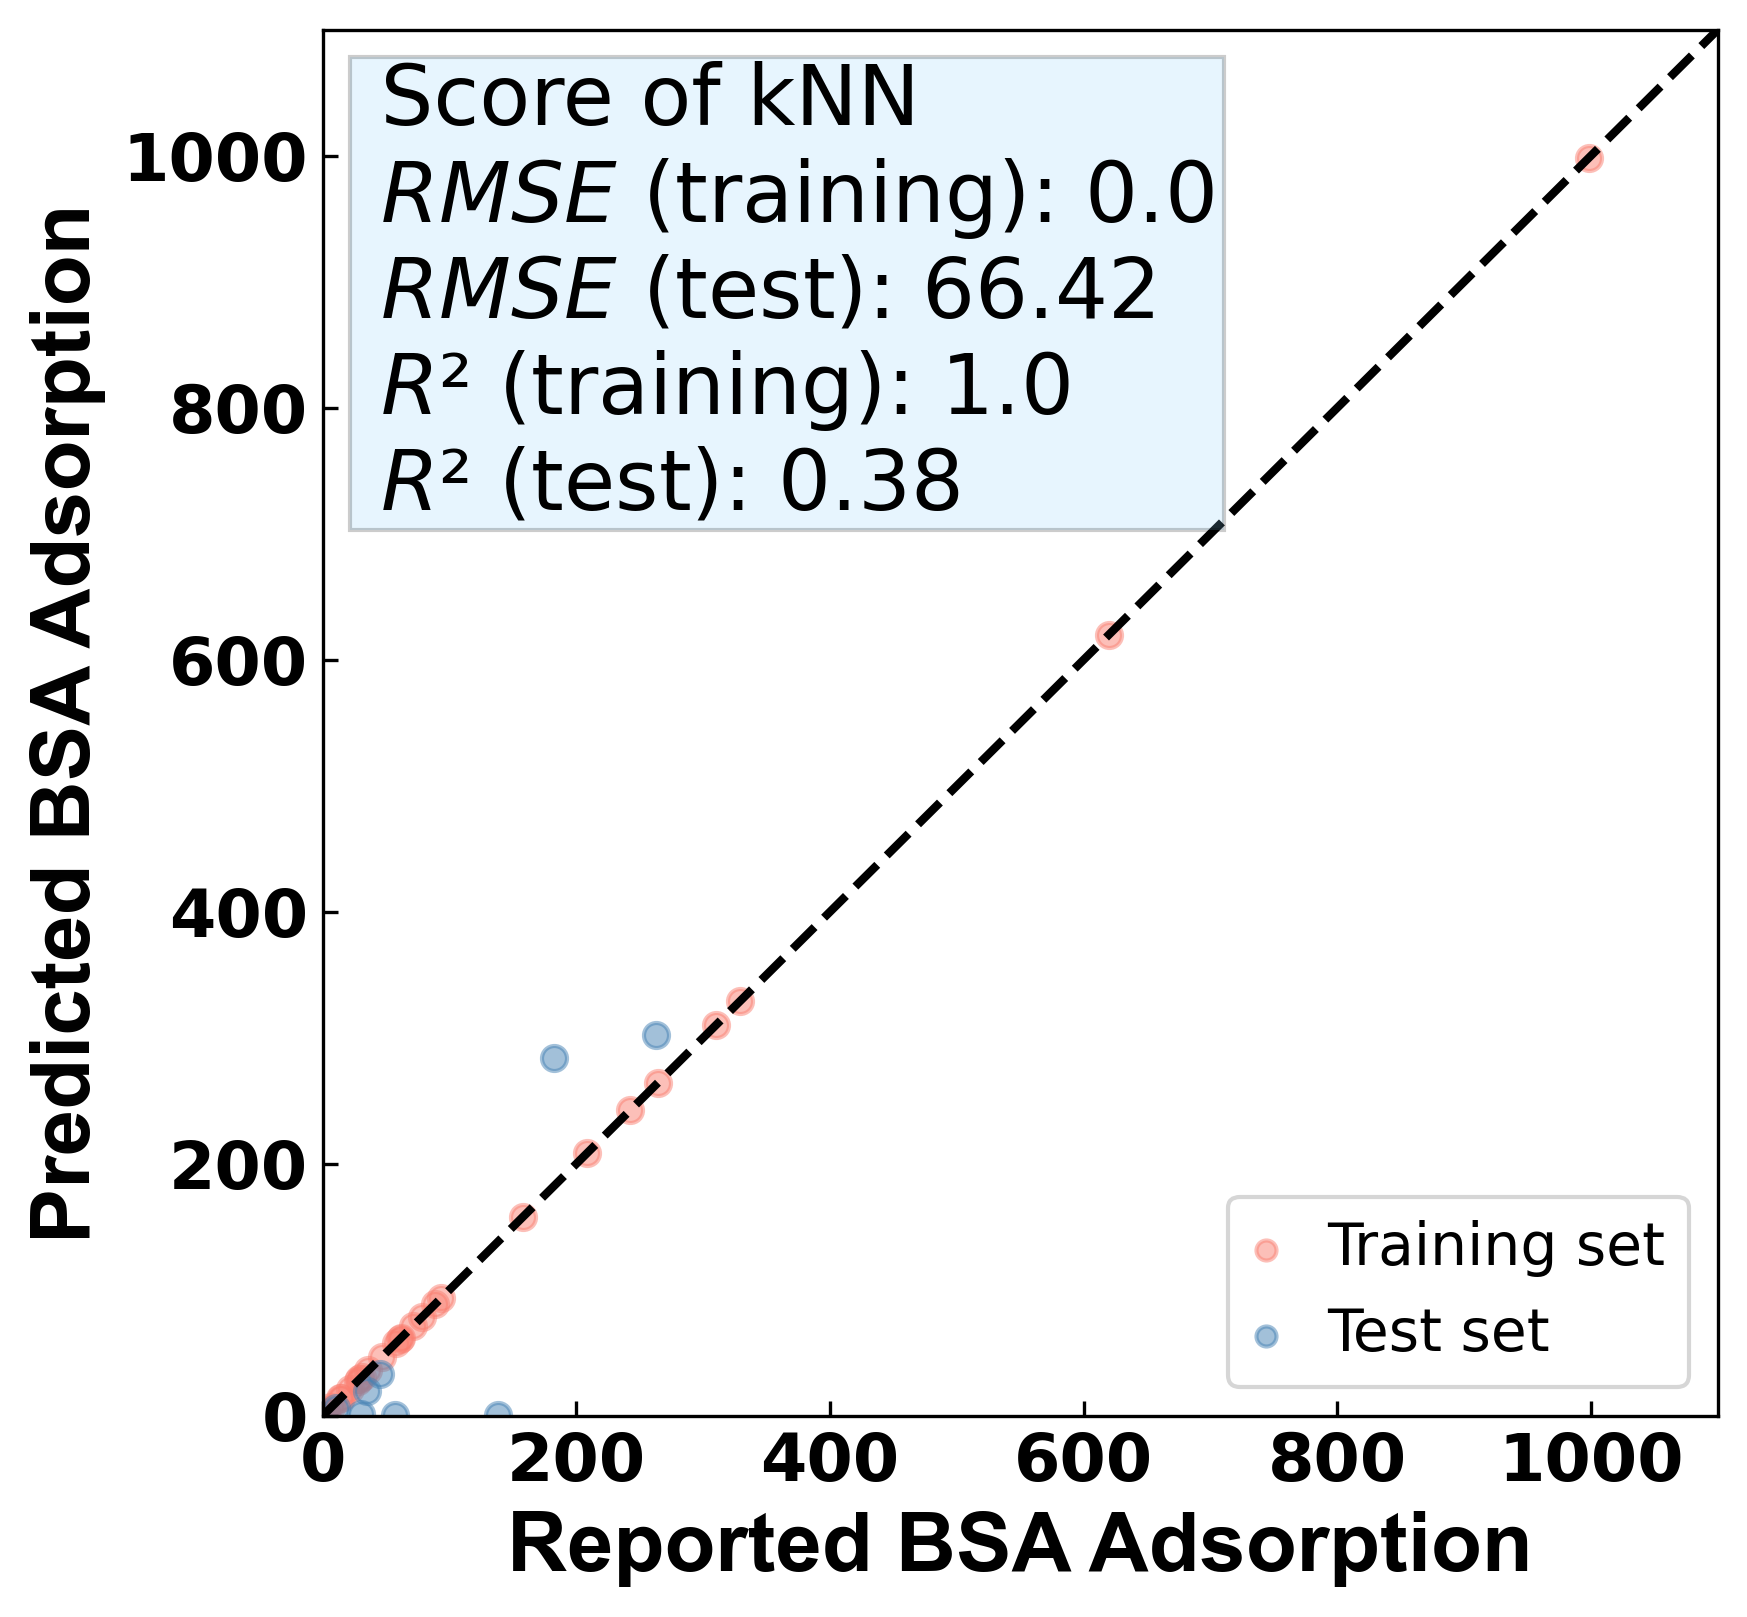

<Figure size 640x480 with 0 Axes>

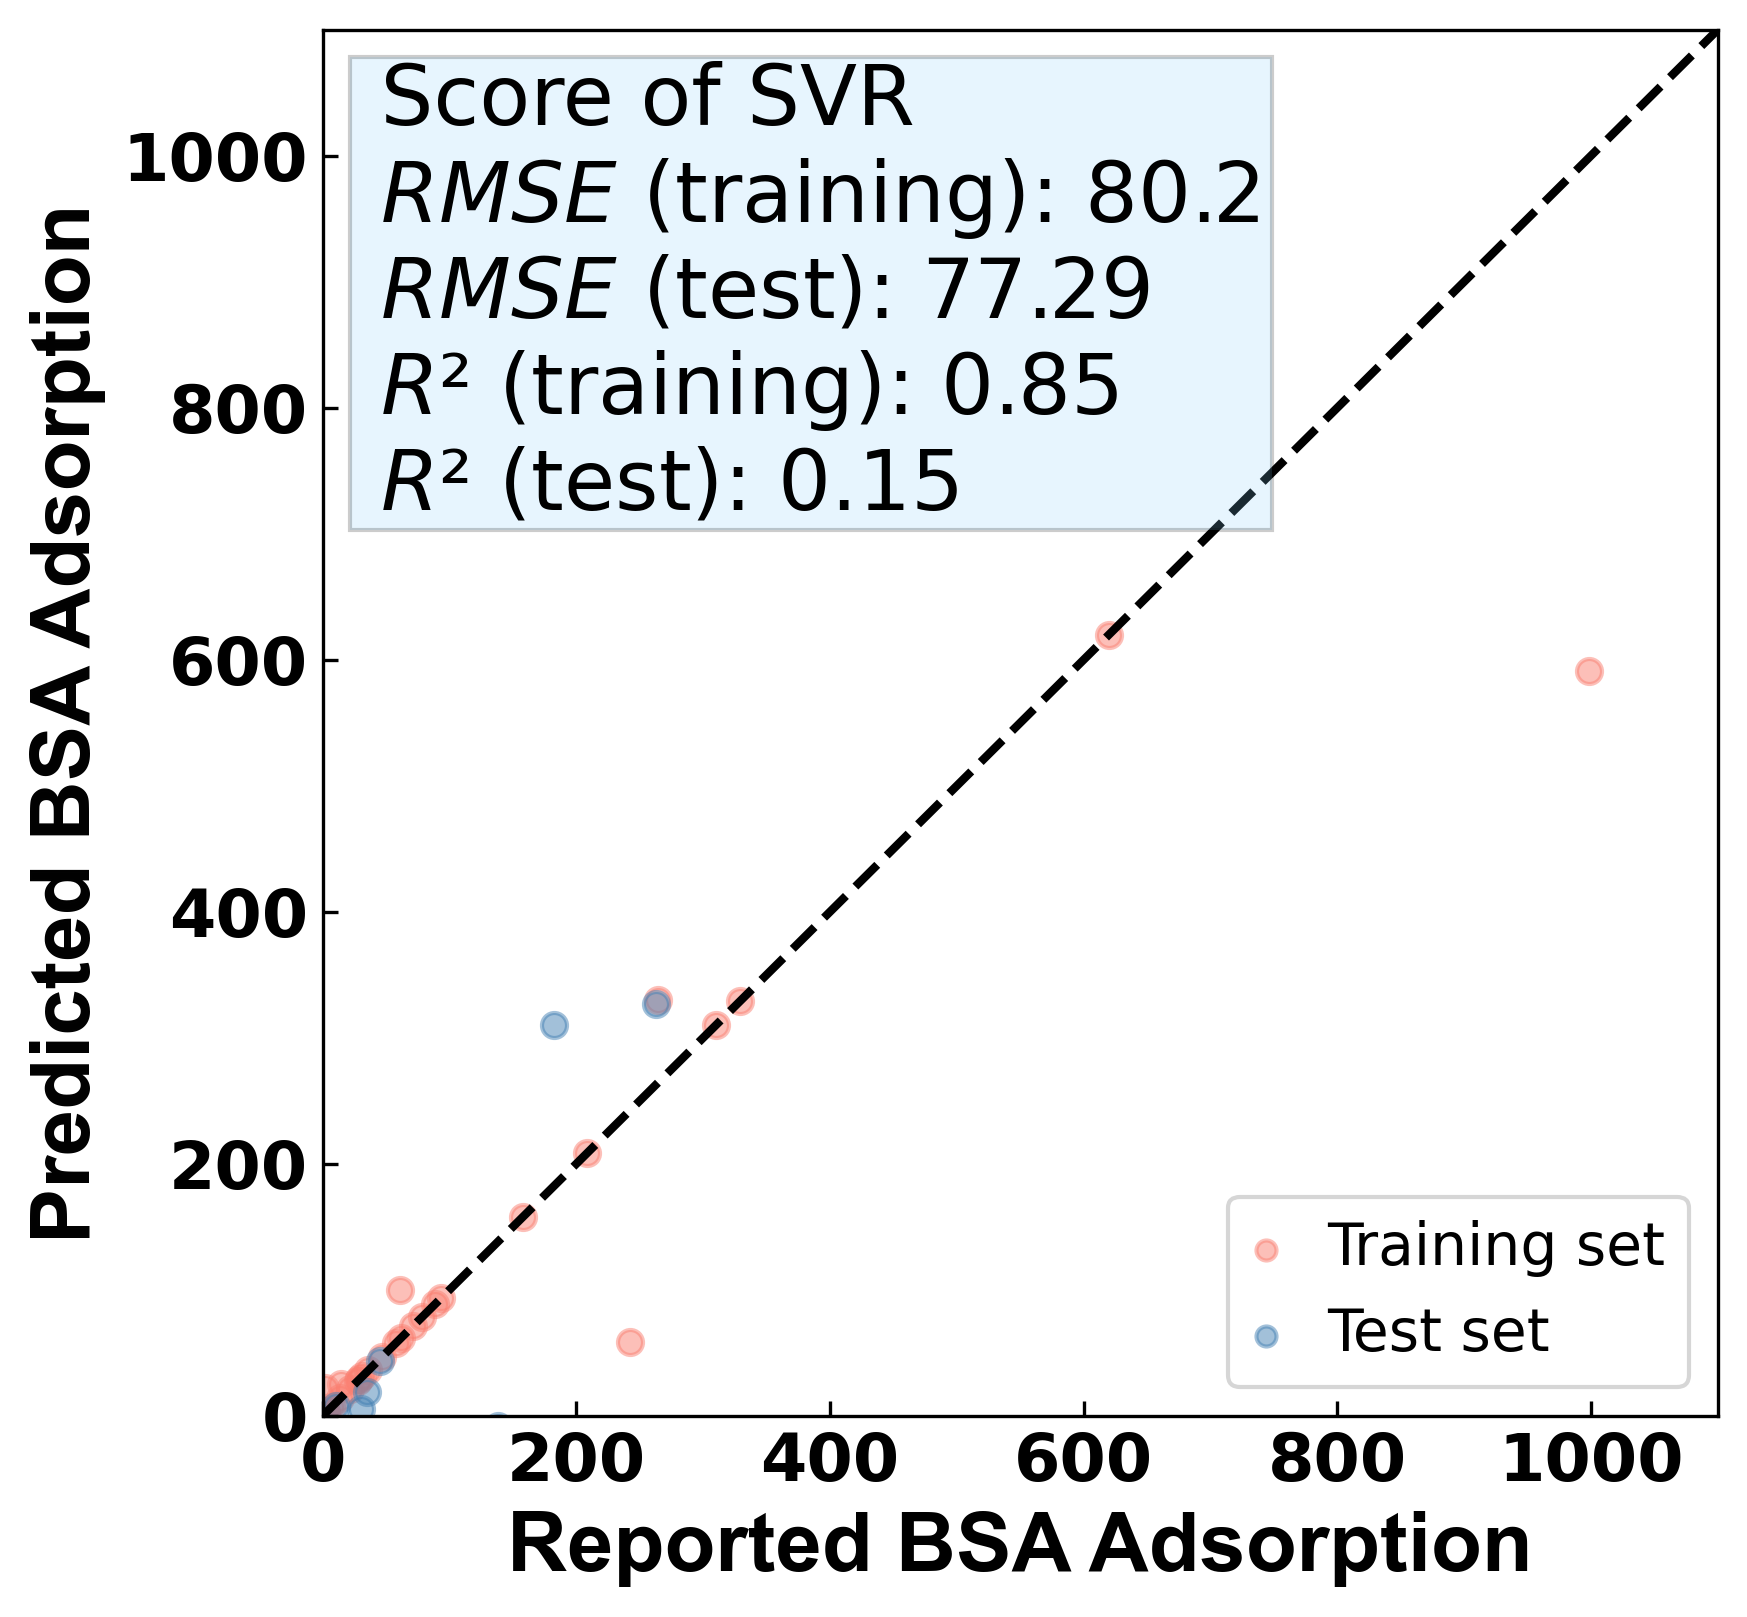

<Figure size 640x480 with 0 Axes>

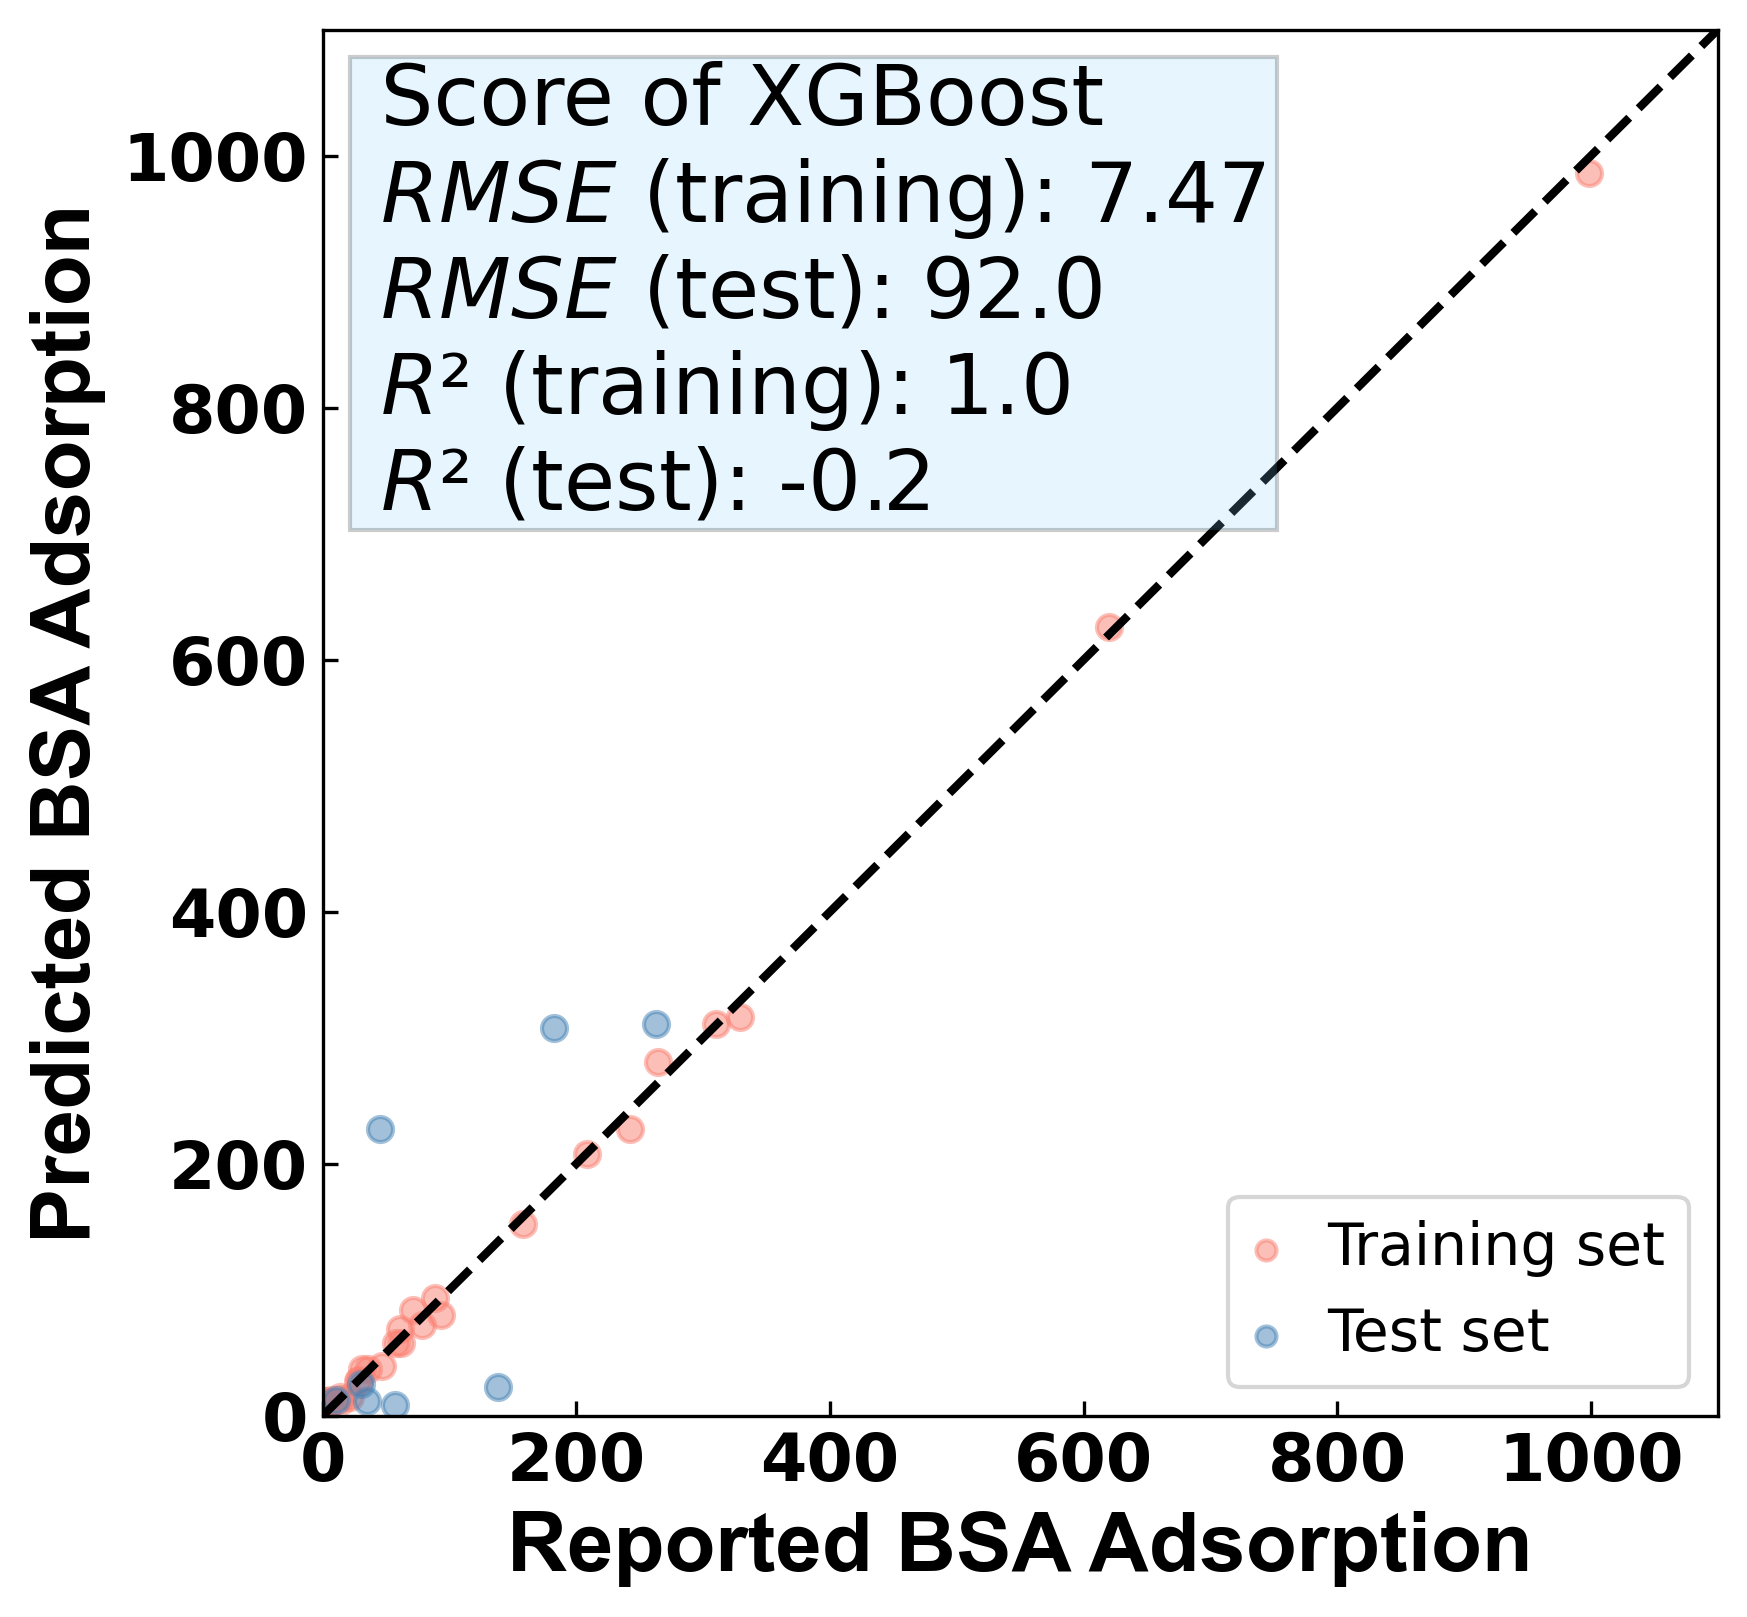

<Figure size 640x480 with 0 Axes>

In [43]:
models_name = ["LASSO", "Ridge", "Decision Tree", "Random Forest", "kNN", "SVR", "XGBoost"]

for i in range(len(trained_models_c)):
    result_show(trained_models_c[i], models_name[i], X_part_c, Y_part_array, X_val_c, Y_val_array)

model_output = "margin" has been renamed to model_output = "raw"
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


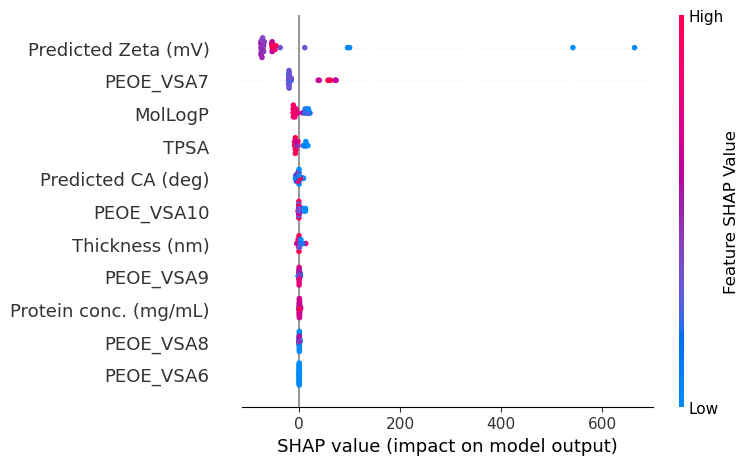

In [44]:
explainer = shap.TreeExplainer(model=trained_models_c[3],
                                feature_perturbation='tree_path_dependent',
                                model_output='margin')
shap_values = explainer.shap_values(X_part_c)
shap.summary_plot(shap_values, X_part_c, feature_names=df_c.columns.values, plot_size=(8,5), color_bar_label="Feature SHAP Value", auto_size_plot=None)